<a href="https://colab.research.google.com/github/Ci-Daniels/qualia-connect-ML/blob/main/final_year_project_kariithi_icms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the ICMS Final year machine learning model.

Name: Kariithi Anne,

Reg Number: ENE212-0081/2018,

Projet ID :046,

Project name: ICMS v2,

**ABOUT DATASET**

**CONTEXT**

-ECG Heartbeat Categorization Dataset

**ABSTRACT**

This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network.

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

**CONTENT**

**Arrhythmia Dataset**

Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

**The PTB Diagnostic ECG Database**

Number of Samples: 14552
Number of Categories: 2
Sampling Frequency: 125Hz

DATA SOURCE:
Physionet's PTB Diagnostic Database

REMARK:
All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.

**DATA FILES**

This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs.

ACKNOWLEDGEMENT

Mohammad Kachuee, Shayan Fazeli, and Majid Sarrafzadeh. "ECG Heartbeat Classification: A Deep Transferable Representation." arXiv preprint arXiv:1805.00794 (2018).

# IMPORTING MAIN PACKAGES

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import seaborn as sns

from sklearn.utils import class_weight, resample
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# UNZIP THE FOLDER CONATINING THE DATASETS
List the datasets in the unzipped file

In [5]:
!unzip /content/archive.zip -d /content/archive

Archive:  /content/archive.zip
  inflating: /content/archive/mitbih_test.csv  
  inflating: /content/archive/mitbih_train.csv  
  inflating: /content/archive/ptbdb_abnormal.csv  
  inflating: /content/archive/ptbdb_normal.csv  


### Read the test set and displaying the first 5 rows

In [6]:
test_data = pd.read_csv("/content/archive/mitbih_test.csv" , header =None)
test_data.head() #display the first 5 rows of the dataset

0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

## Read the train data set and displaying the first 5 rows

In [7]:
train_data = pd.read_csv("/content/archive/mitbih_train.csv" , header =None)
train_data.head()

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [32]:
last_column_data =train_data.iloc[:,-1]
print(last_column_data) #is the class

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64


## Read the normal data set and displaying the first 5 rows

In [8]:
normal_data = pd.read_csv("/content/archive/ptbdb_normal.csv" , header =None)
normal_data.head()

0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

## Read the abnormal data set and displaying the first 5 rows

In [9]:
abnormal_data = pd.read_csv("/content/archive/ptbdb_abnormal.csv" , header =None)
abnormal_data.head()

0         1         2         3         4         5         6    \
0  0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1  1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2  1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3  0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4  0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 188 columns]

### Check for training set distribution

the given classes from the datasets are:
Classes:

'N': 0, -> Normal class 0

'S': 1, -> Supraventricular class 1

'V': 2, -> Ventricular class 2

'F': 3, -> Fusion class 3

'Q': 4, -> Unknownclass 4
  

In [10]:
print('The training set class distribution')
print(train_data[187].value_counts())

The training set class distribution
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


### Check for test set distribution

In [11]:
print('The test set class distribution')
print(test_data[187].value_counts())

The test set class distribution
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


Need to resample the data so as to have a similar number of samples in all classes in order to prevent over fitting

### Downsample the training data to 2200

In [12]:
Normal = train_data[train_data[187]==0.0].sample(n=2000, random_state=42)
Superventricular= train_data[train_data[187]==1.0].sample(n=2000, random_state=42)
Ventricular = train_data[train_data[187]==2.0].sample(n=2000, random_state=42)
Fusion = train_data[train_data[187]==3.0]
Unknown = train_data[train_data[187]==4.0].sample(n=2000, random_state=42)

#since Fusion class is less than the 2200 samples, we need to add onto it
# upsample
Fusion_inc=resample(Fusion, replace=True, n_samples=2000, random_state=42)


#concatenate the data frames above into one training set
Train_set= pd.concat([Normal,Superventricular,Ventricular,Fusion_inc, Unknown])
print(Train_set[187].value_counts()) #print the number of samples

0.0    2000
1.0    2000
2.0    2000
3.0    2000
4.0    2000
Name: 187, dtype: int64


### Downsample the test data to 550

In [13]:
Normal =test_data[test_data[187]==0.0].sample(n=550, random_state=42)
Superventricular= test_data[test_data[187]==1.0].sample(n=550, random_state=42)
Ventricular = test_data[test_data[187]==2.0].sample(n=550, random_state=42)
Fusion = test_data[test_data[187]==3.0]
Unknown = test_data[test_data[187]==4.0].sample(n=550, random_state=42)

#since Fusion class is less than the 550 samples, we need to add onto it
# upsample
Fusion_inc=resample(Fusion, replace=True, n_samples=550, random_state=42)


#concatenate the data frames above into one training set
Test_set = pd.concat([Normal,Superventricular,Ventricular,Fusion_inc, Unknown])
print(Test_set[187].value_counts()) #print the number of samples

0.0    550
1.0    550
2.0    550
3.0    550
4.0    550
Name: 187, dtype: int64


In [14]:
len(Test_set) #check for the length of the new test dataset ; we see its equally divided within the classes

2750

### Check for null points in the datasets

In [15]:
#checks for null oints in the new train set
Train_set.isnull().values.sum()

#checks for null oints in the new test set
Test_set.isnull().values.sum()

0

In [16]:
#drop duplicate values in the train set;normalize data
Train_set.drop_duplicates(keep=False, inplace=True)


Displaying sample signals from the datasets of the various classes

In [17]:
color = ['green','blue','purple','orange','red']
label = ["Normal","Supraventricular","Ventricular","Fusion", "Unknown"]

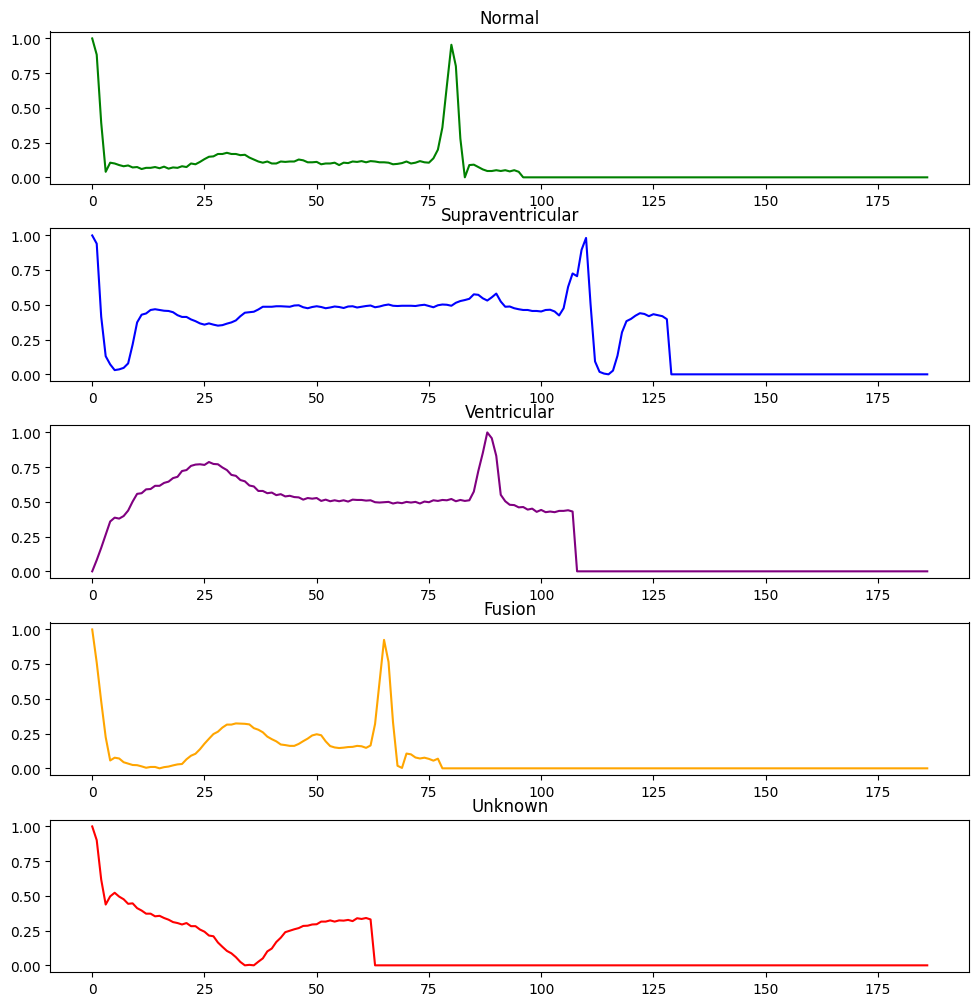

In [129]:
#plot the different grapghs to show how the ECG signal graphs look like
fig, ax = plt.subplots(5, figsize=(10, 10))
plt.tight_layout()

for i in range(5):
    t = ax[i].plot((Train_set[Train_set[187] == i].iloc[10])[:-1], color=color[i])
    ax[i].title.set_text(label[i])

fig.savefig("ECG_signal_plots.jpeg")

## Data Processing

Split data into training, test and validation sets.

 - Since we are doing multi-class classification, we need to transform the data into categorical format in order to perform one-hit encoding. That is:

- In our case we have 5 classes of data within our datasets. therefore, we need to allocate every class a binarry one inside a matrix in order to Identify it.


'N': 0, -> Normal class 0 -> [1,0,0,0,0]

'S': 1, -> Supraventricular class 1 -> [0,1,0,0,0]

'V': 2, -> Ventricular class 2 -> [0,0,1,0,0]

'F': 3, -> Fusion class 3 -> [0,0,0,1,0]

'Q': 4, -> Unknownclass 4 -> [0,0,0,0,1]

In [160]:
from sklearn.model_selection import train_test_split
#Split dataset and perform one hot encoding on the data
y_train = to_categorical(Train_set[187])
y_test = to_categorical(Test_set[187])

# We need to extracting the input features from the training & test datasets.
# We select all rows and the first 187 columns (features) from the
# Both the Train_Set and Test_set dataFrame and converts them into a NumPy_array
x_train = Train_set.iloc[:,:187].values
x_test = Test_set.iloc[:,:187].values

#print y shape
print(y_test.shape)

#print x shape
print(x_test.shape)


(2750, 5)
(2750, 187)


## TRAINING OF DIFFERENT MODELS AND PREPARING THEIR CLASSIFICATION REPORTS

## K-Nearest Neighbour Model

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Set K parameters and Fit the model with the x and y train datasets

In [162]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

Predict Y usind the X test dataset

In [163]:
y_predict = KNN_model.predict(x_test)


In [164]:
# output the y_predict
y_predict


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [165]:
#output y test
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [178]:
# Analyse the above to see how the accuracy of the model behaves using the
# classification report argmax(axis=1) is used to convert the predicted
# one-hot encoded vectors into class labels.It returns an array of class labels
# representing the predicted class for each data sample in the test dataset.

print(classification_report(y_test.argmax(axis=1),y_predict))



              precision    recall  f1-score   support

           0       0.65      0.91      0.76       550
           1       0.86      0.80      0.83       550
           2       0.77      0.94      0.85       550
           3       0.99      0.47      0.64       550
           4       0.97      0.97      0.97       550

    accuracy                           0.82      2750
   macro avg       0.85      0.82      0.81      2750
weighted avg       0.85      0.82      0.81      2750



## Support Vector Machines

Since our ECG signals are time series data in nature, and have nonlinear relationships and long temporal dependencies to time,

I opted to try the SVM model to see its performance in the test set.

In [167]:
#import the support vector classifier
from sklearn.metrics.pairwise import linear_kernel
from sklearn.svm import SVC

#create the model and set classifier parameters
#svm_model = SVC(C=3, kernel ="linear","rbf", "sigmoid, " )
svm_model = SVC(C=3, kernel="rbf")
#train the model using the training datasets and convert the output into
#a 1d array of a single label per data sample
svm_model = svm_model.fit(x_train, y_train.argmax(axis=1))


In [168]:

#need to reshape back the x test set into a 2D array
#x_test_2d = x_test.reshape(len(x_test), x_test.shape[1])

#predict
y_predict = svm_model.predict(x_test)



In [180]:
from sklearn.metrics import classification_report
#print the classification report
print(classification_report(y_test.argmax(axis=1),y_predict))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       550
           1       0.86      0.80      0.83       550
           2       0.77      0.94      0.85       550
           3       0.99      0.47      0.64       550
           4       0.97      0.97      0.97       550

    accuracy                           0.82      2750
   macro avg       0.85      0.82      0.81      2750
weighted avg       0.85      0.82      0.81      2750



### Track how the training went for both models and display their accuracies

## KNN MODEL

In [181]:
print("Accuracy of the KNN model is : ", metrics.accuracy_score(y_test.argmax(axis=1),y_predict))


Accuracy of the KNN model is :  0.8174545454545454


## SVM MODEL


In [182]:
print("Accuracy of the KNN model is : ", metrics.accuracy_score(y_test.argmax(axis=1),y_predict))


Accuracy of the KNN model is :  0.8174545454545454


# NEURAL NETWORK TRAINING

In [183]:
import tensorflow as tf

In [184]:
def plot_history(history):
  fig, (ax1 , ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)


  plt.legend()  # Add legend to each subplot
  plt.tight_layout()  # Adjust the spacing between subplots for better visibility
  plt.show()

In [185]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation ='relu' , input_shape = (187,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation ='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(5, activation ='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss= 'binary_crossentropy'
              , metrics =['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs= epochs, batch_size=batch_size, validation_data=(x_test, y_test),
      verbose =0 #to not sisplay the epoch during training
  )

  return nn_model, history

16 nodes, 0 dropout_prob, 0.01 lr, 32 batch_size


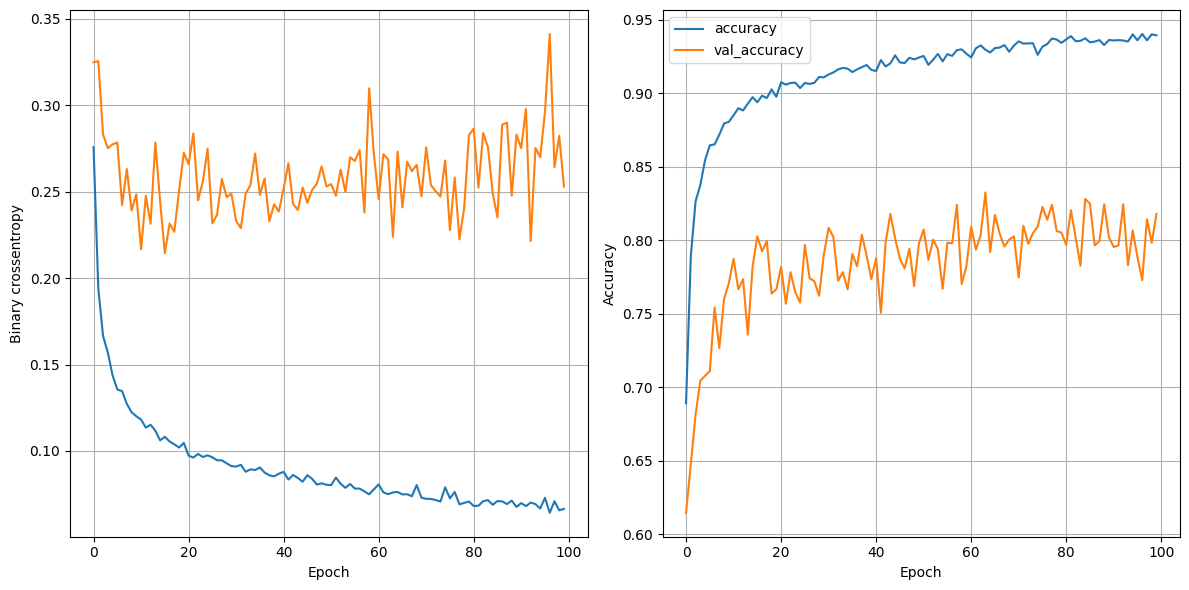

86/86 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.8178
16 nodes, 0 dropout_prob, 0.01 lr, 64 batch_size


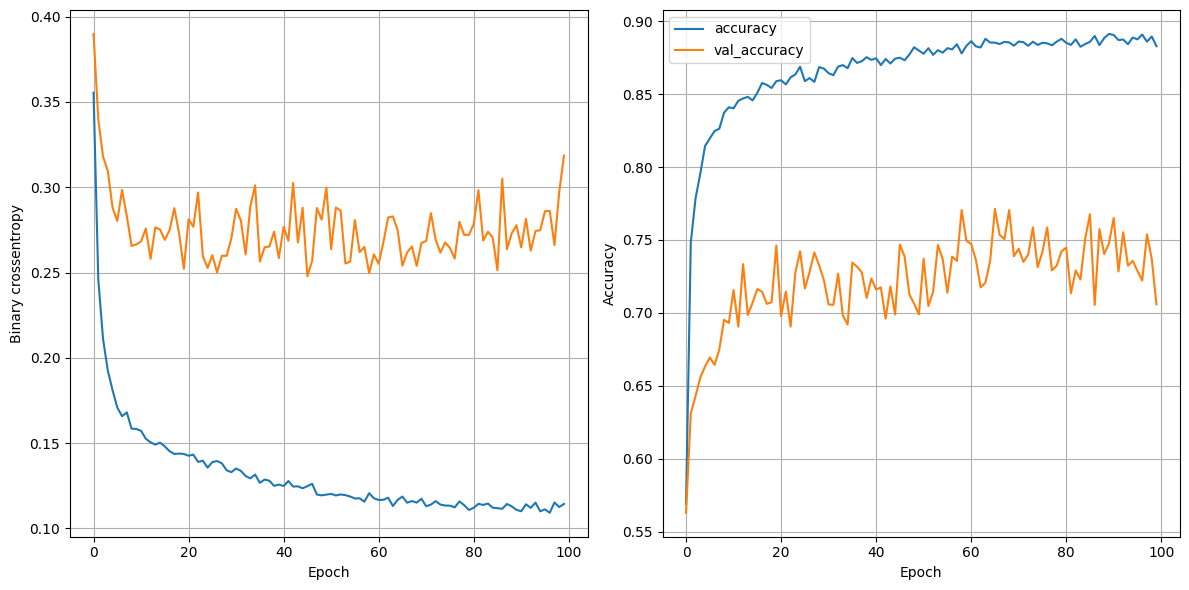

86/86 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.7058
16 nodes, 0 dropout_prob, 0.01 lr, 128 batch_size


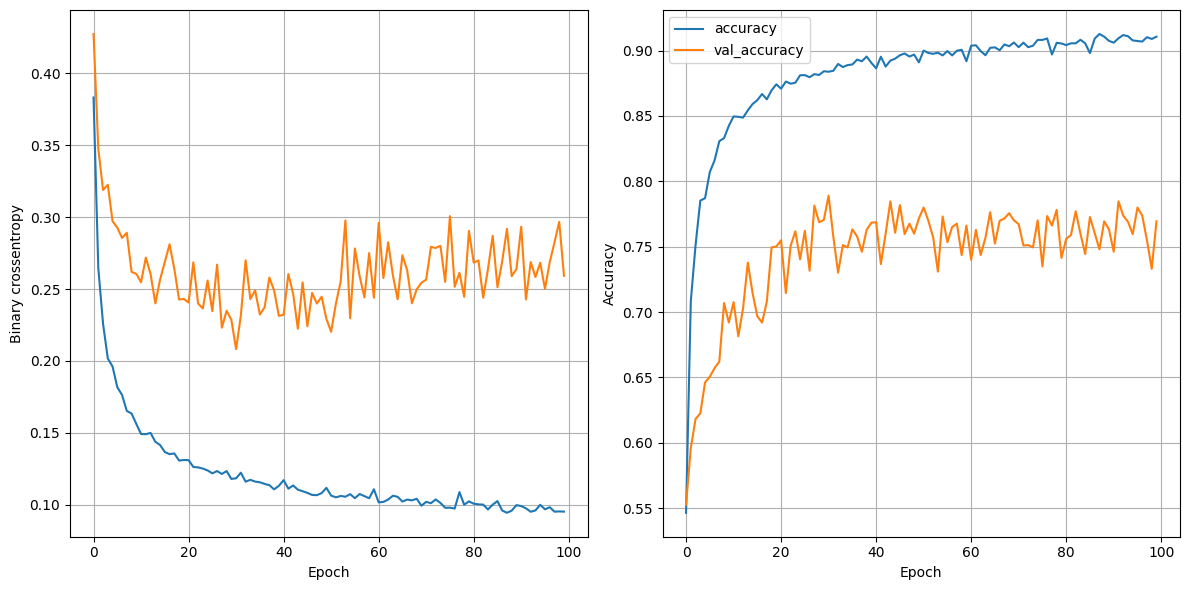

86/86 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.7695
16 nodes, 0 dropout_prob, 0.005 lr, 32 batch_size


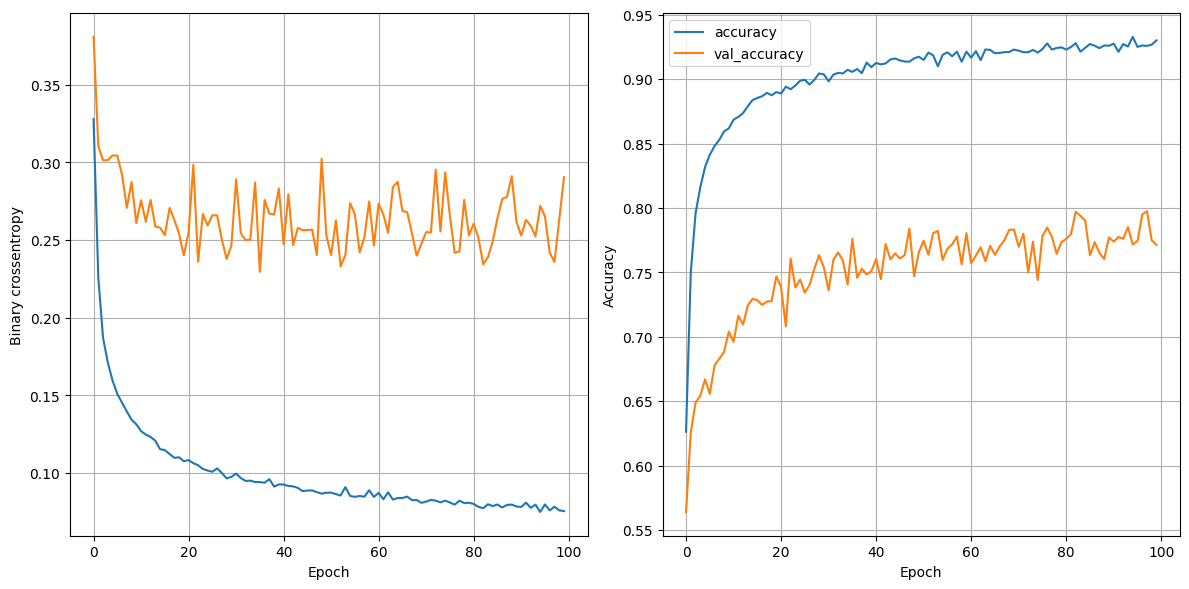

86/86 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.7713
16 nodes, 0 dropout_prob, 0.005 lr, 64 batch_size


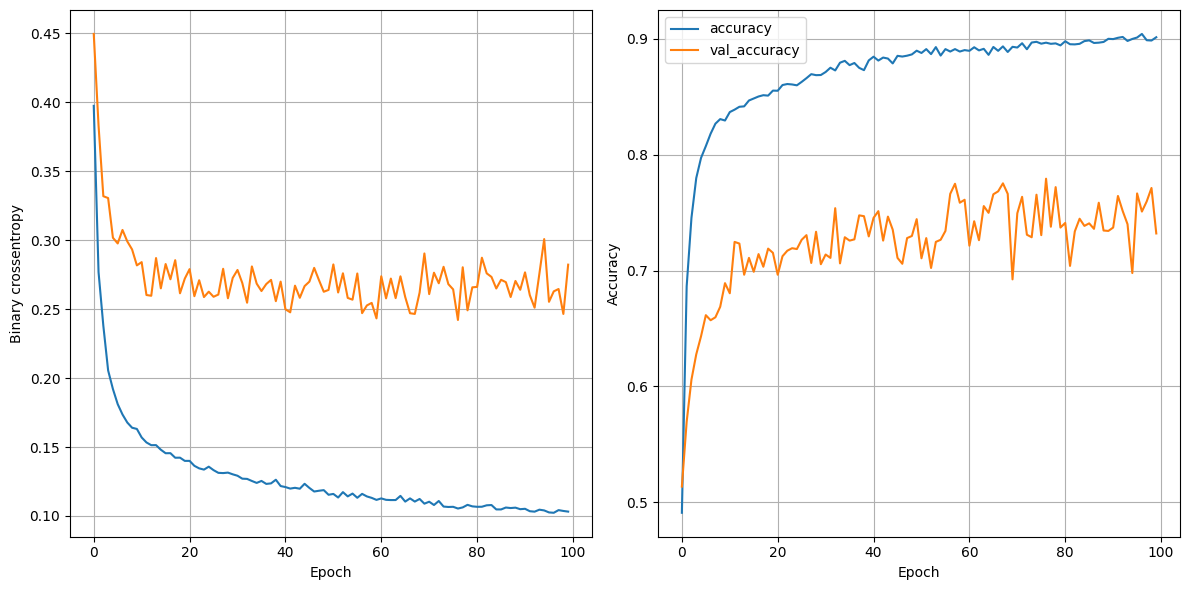

86/86 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.7320
16 nodes, 0 dropout_prob, 0.005 lr, 128 batch_size


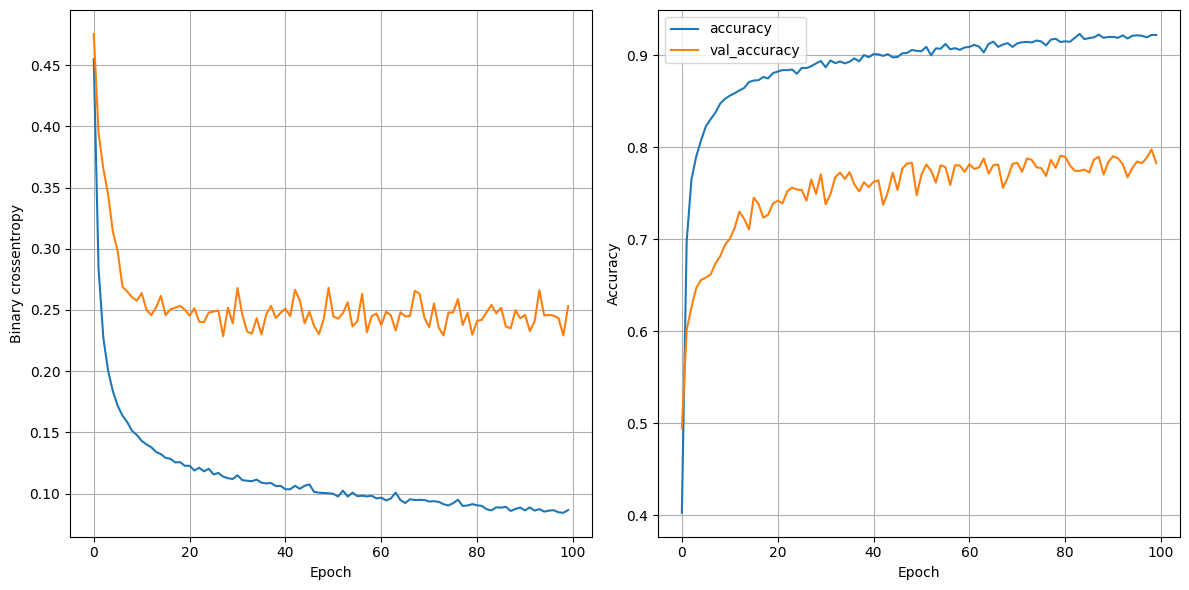

86/86 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.7829
16 nodes, 0 dropout_prob, 0.0001 lr, 32 batch_size


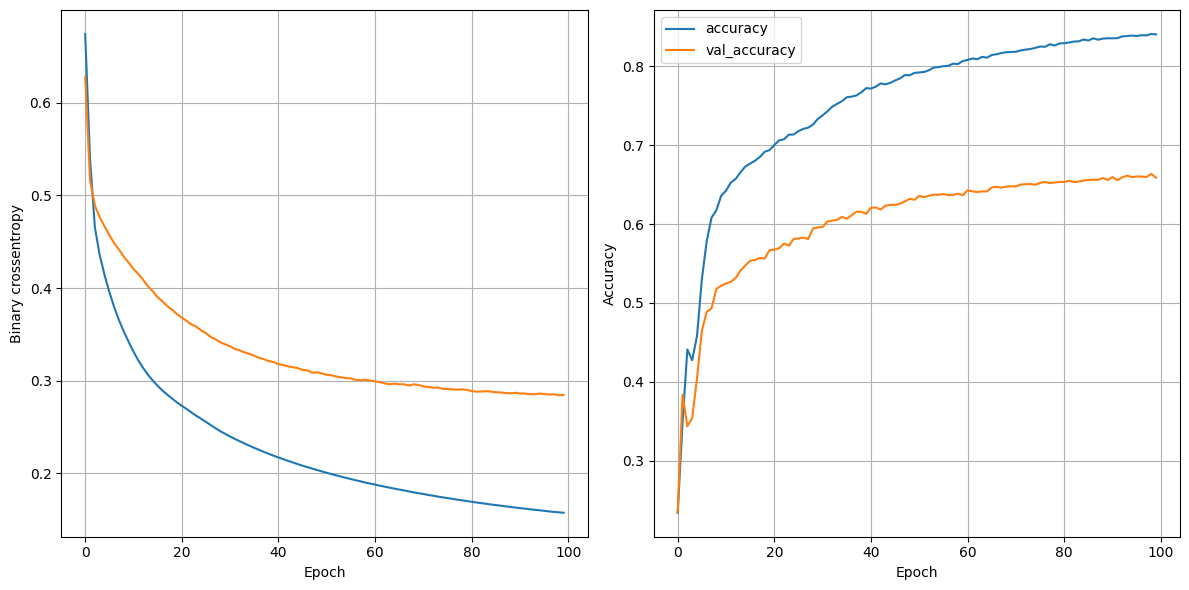

86/86 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.6589
16 nodes, 0 dropout_prob, 0.0001 lr, 64 batch_size


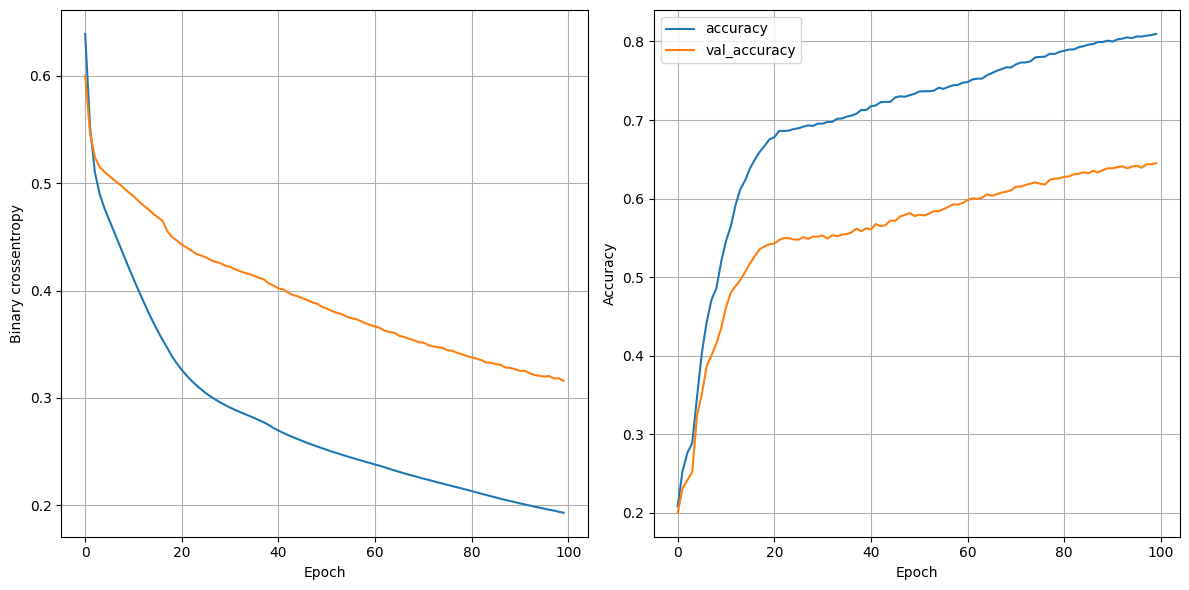

86/86 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.6451
16 nodes, 0 dropout_prob, 0.0001 lr, 128 batch_size


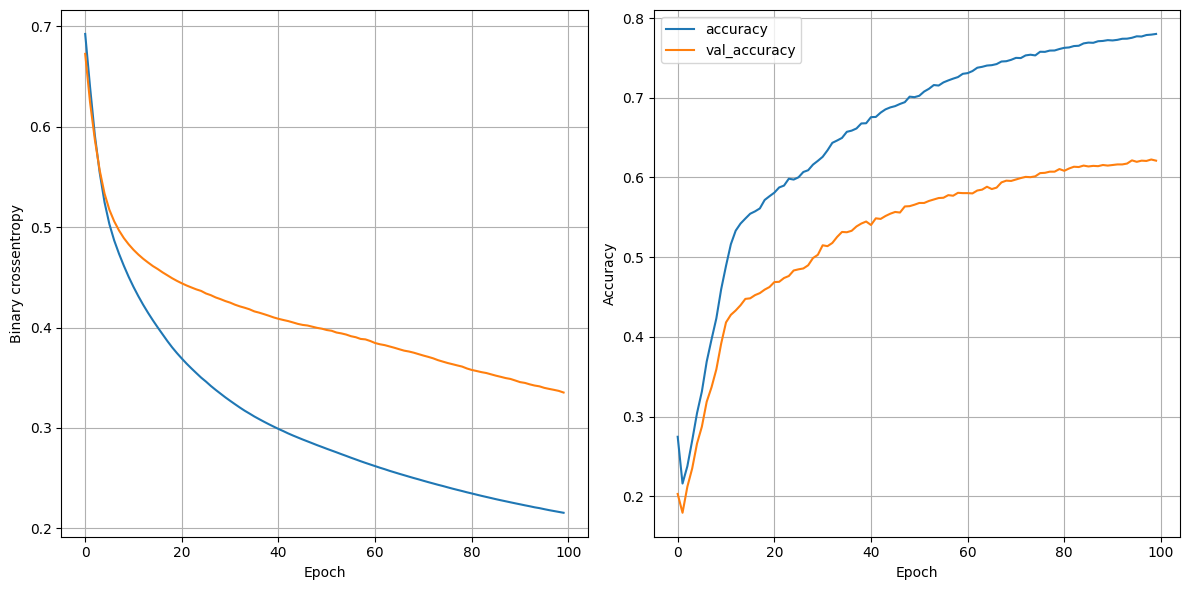

86/86 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.6211
16 nodes, 0.2 dropout_prob, 0.01 lr, 32 batch_size


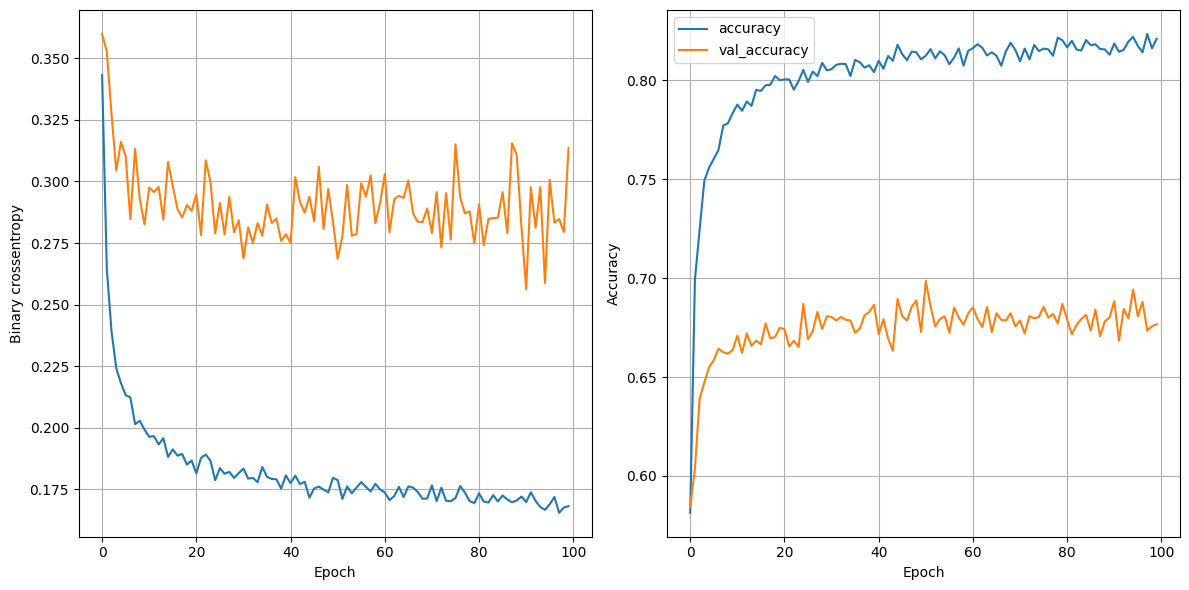

86/86 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.6767
16 nodes, 0.2 dropout_prob, 0.01 lr, 64 batch_size


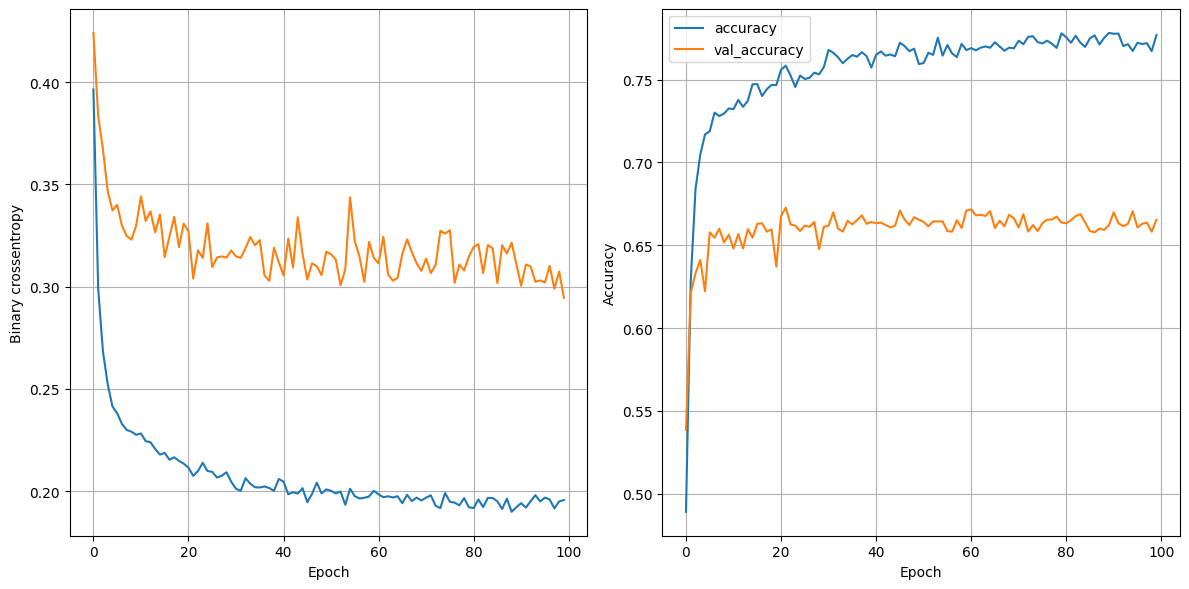

86/86 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.6655
16 nodes, 0.2 dropout_prob, 0.01 lr, 128 batch_size


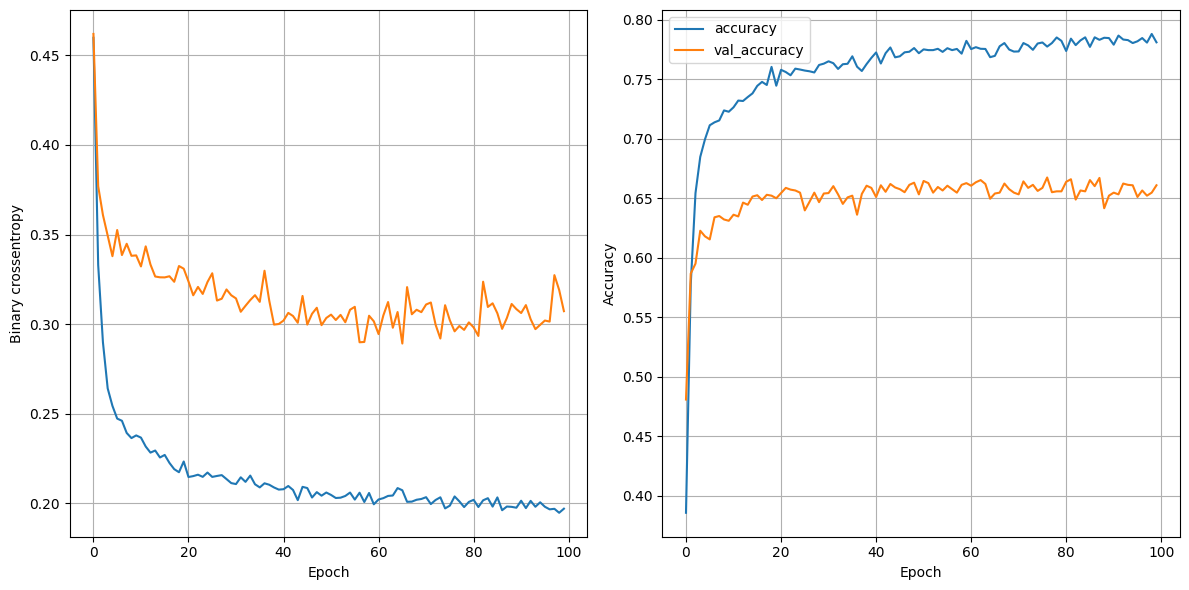

86/86 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.6607
16 nodes, 0.2 dropout_prob, 0.005 lr, 32 batch_size


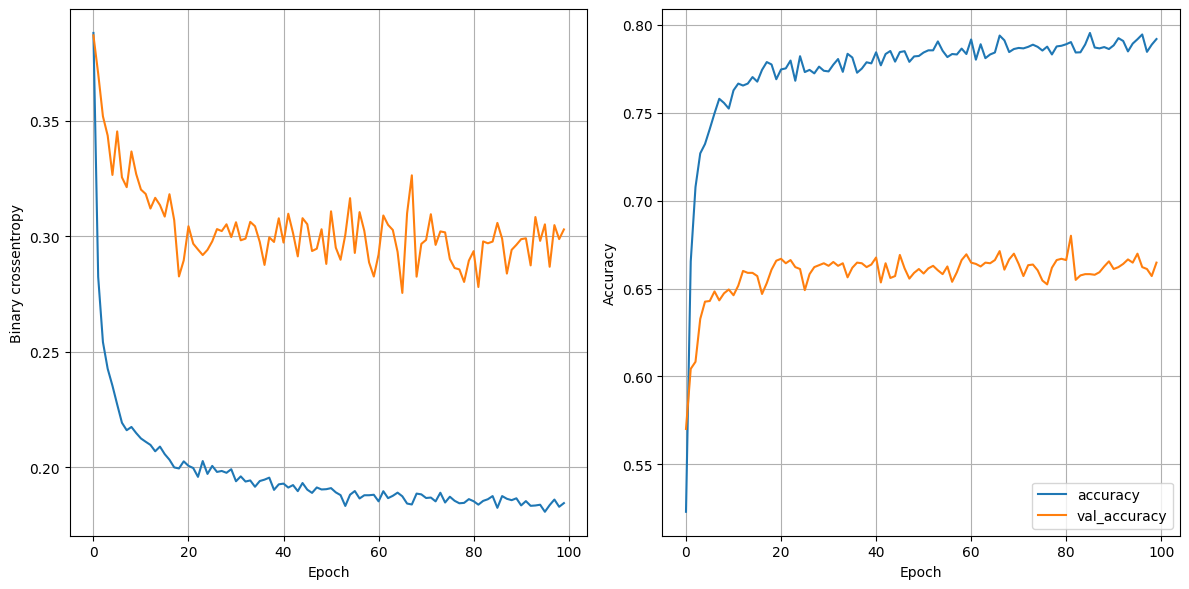

86/86 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.6647
16 nodes, 0.2 dropout_prob, 0.005 lr, 64 batch_size


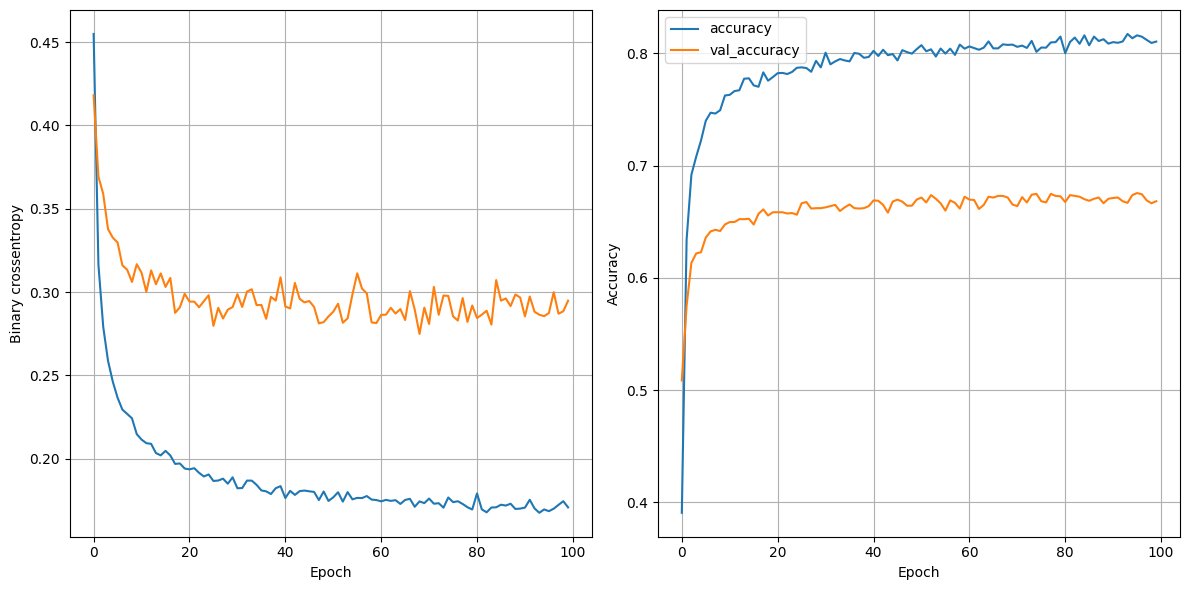

86/86 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.6684
16 nodes, 0.2 dropout_prob, 0.005 lr, 128 batch_size


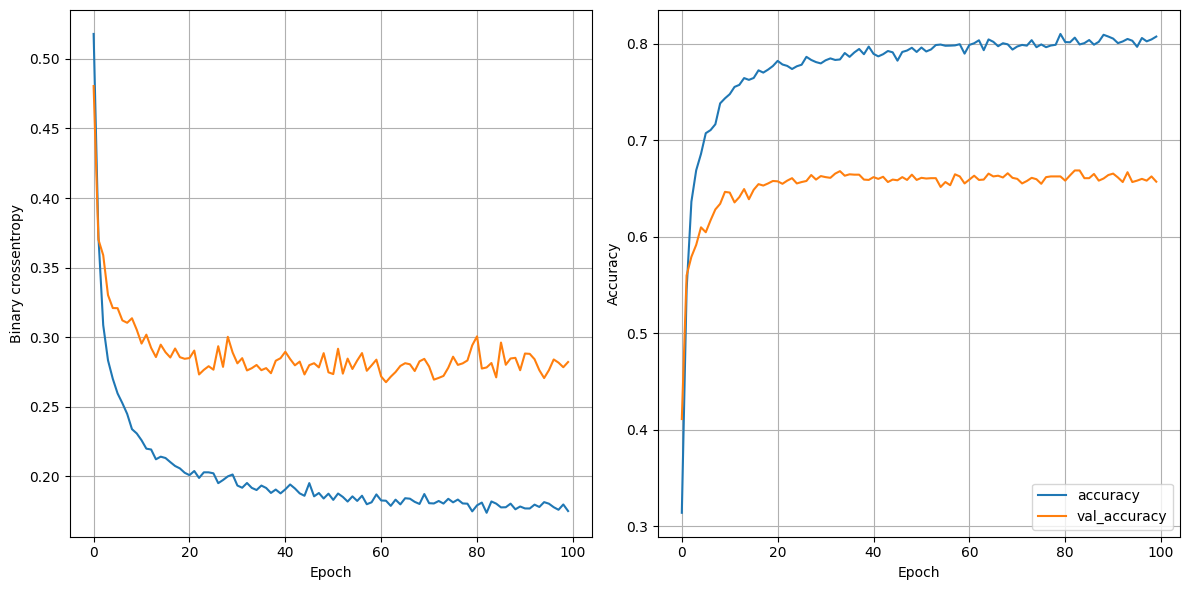

86/86 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.6571
16 nodes, 0.2 dropout_prob, 0.0001 lr, 32 batch_size


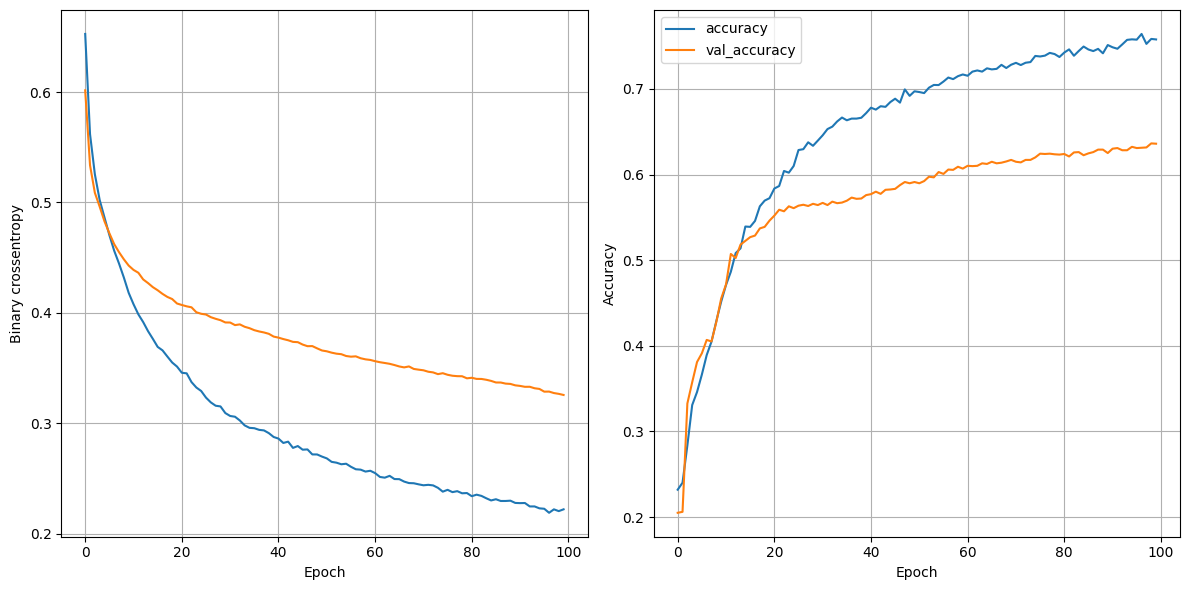

86/86 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.6360
16 nodes, 0.2 dropout_prob, 0.0001 lr, 64 batch_size


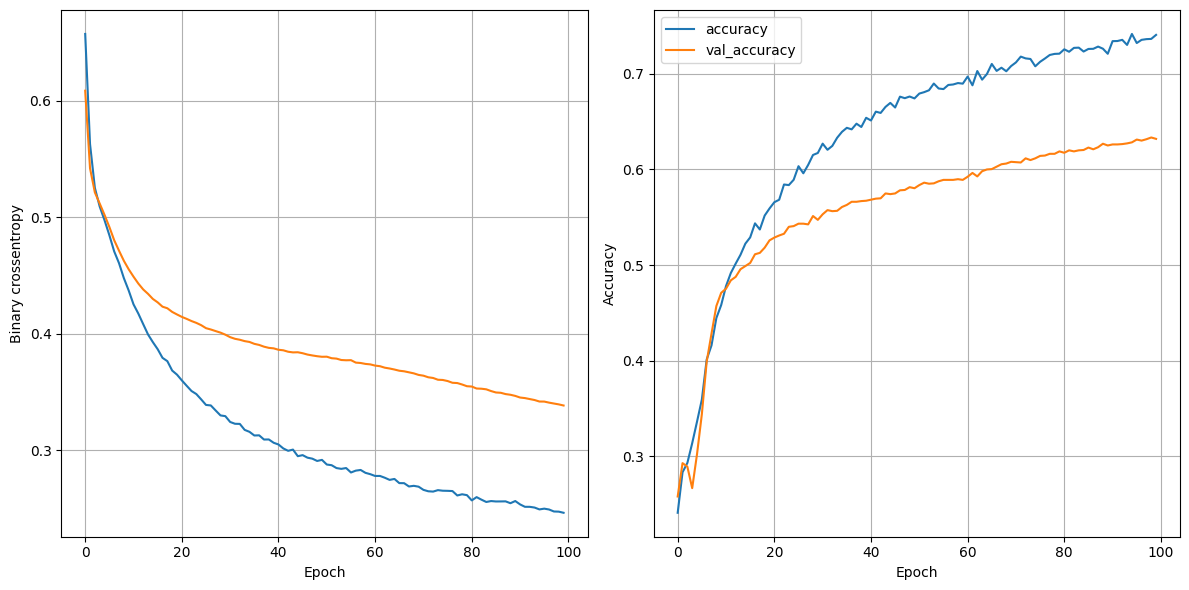

86/86 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.6320
16 nodes, 0.2 dropout_prob, 0.0001 lr, 128 batch_size


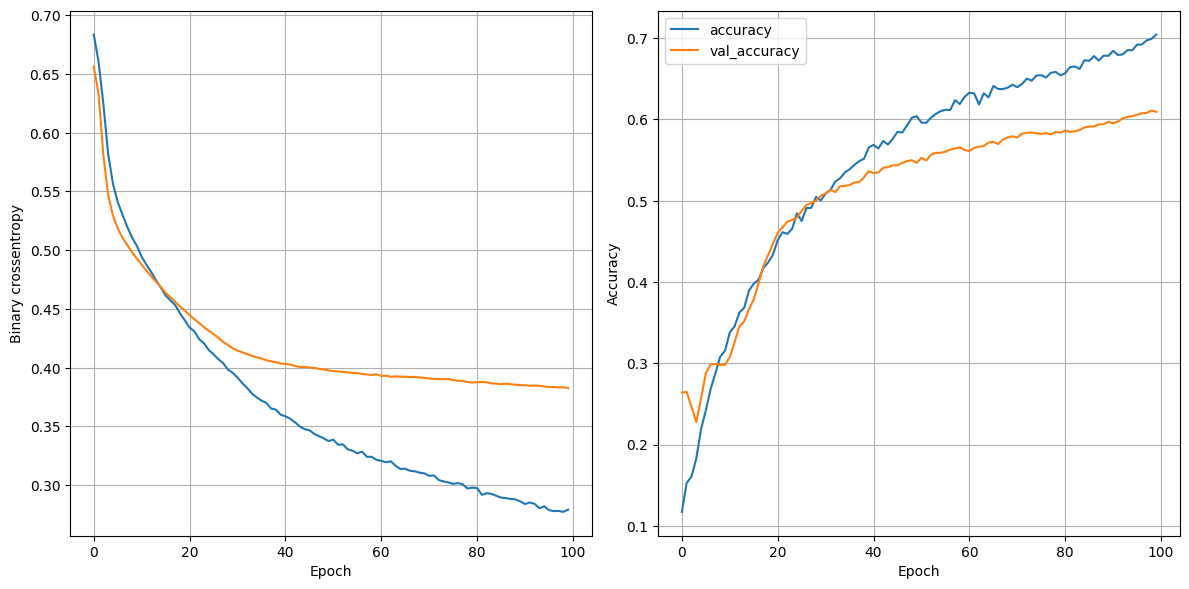

86/86 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.6095
32 nodes, 0 dropout_prob, 0.01 lr, 32 batch_size


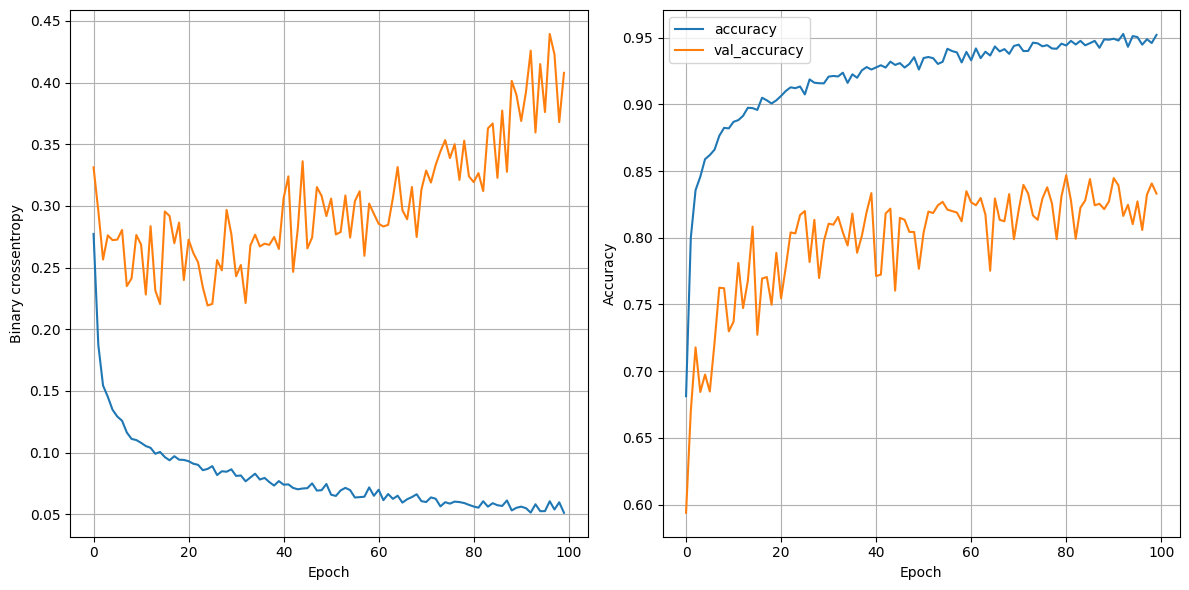

86/86 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8331
32 nodes, 0 dropout_prob, 0.01 lr, 64 batch_size


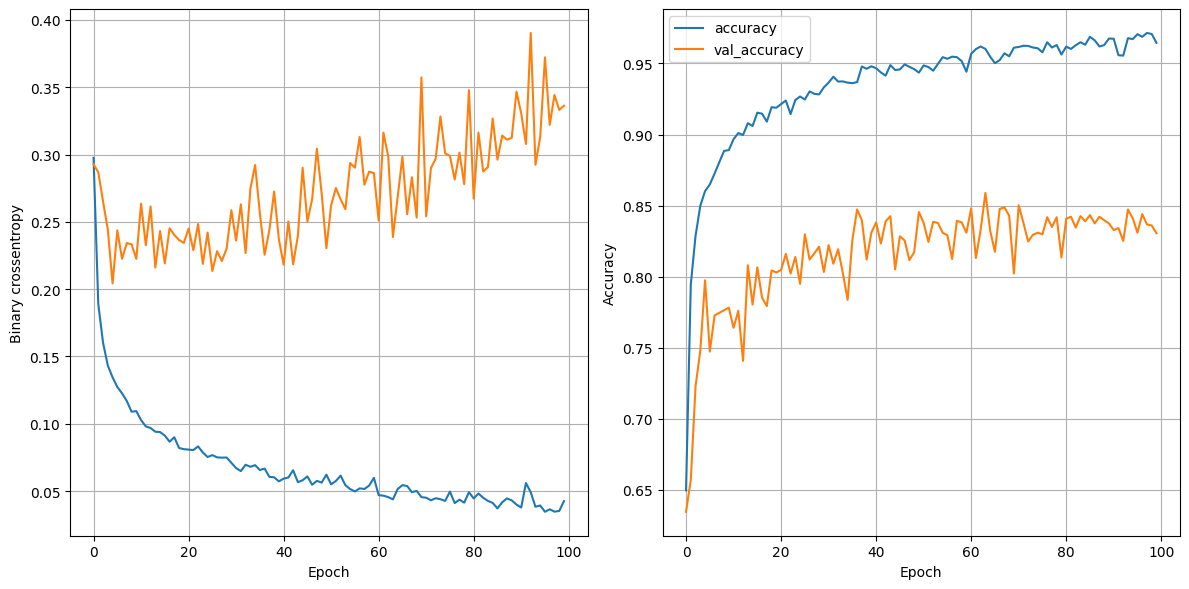

86/86 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8305
32 nodes, 0 dropout_prob, 0.01 lr, 128 batch_size


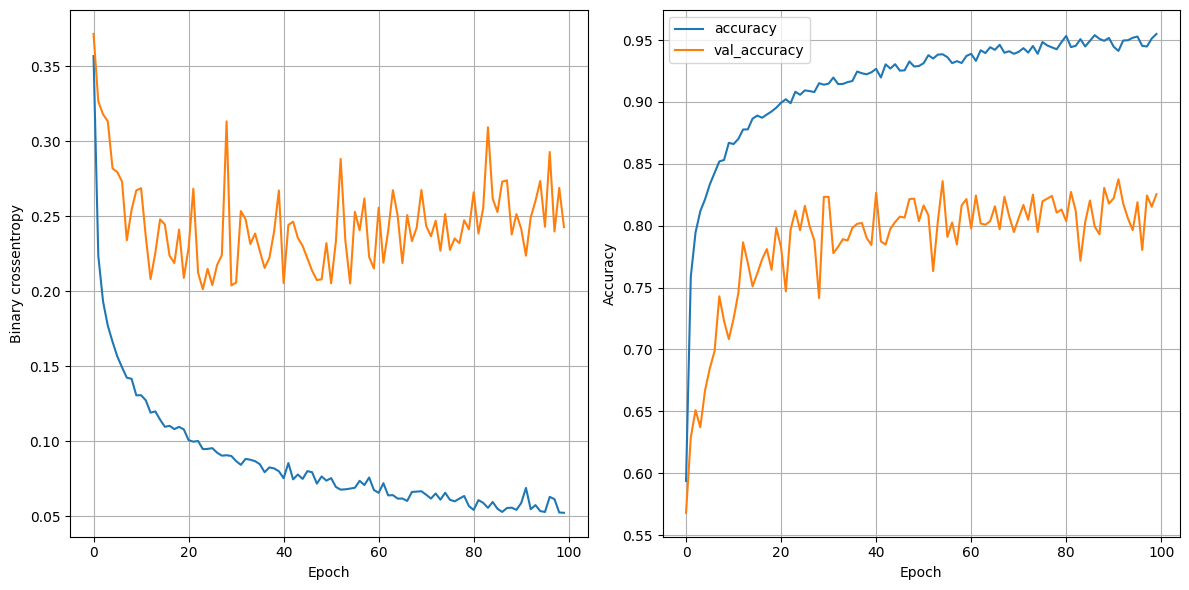

86/86 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.8255
32 nodes, 0 dropout_prob, 0.005 lr, 32 batch_size


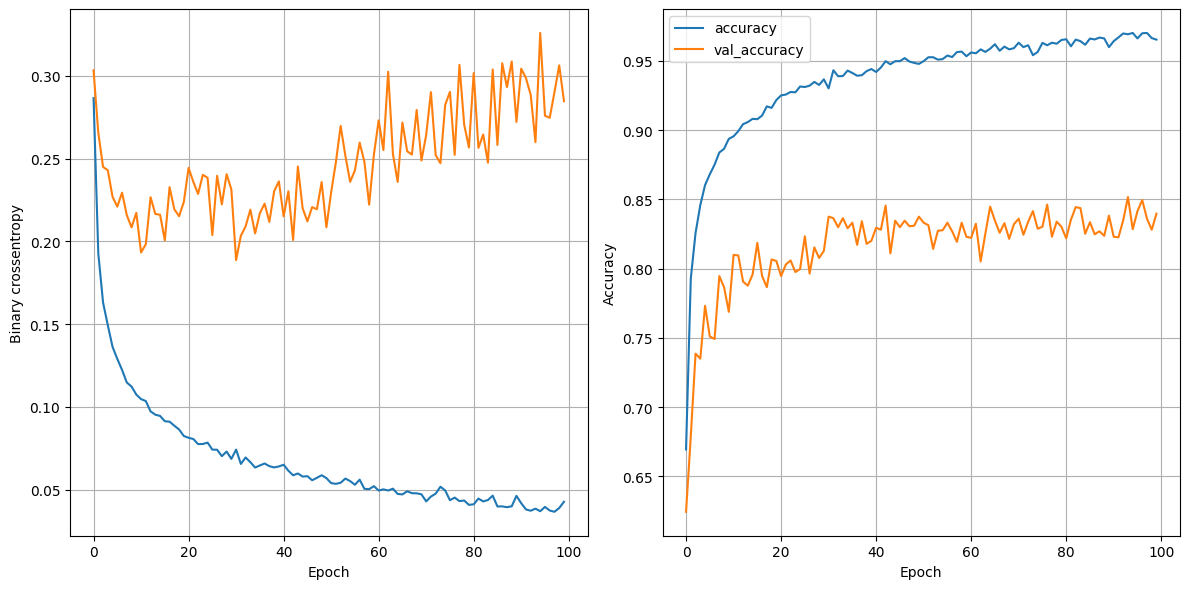

86/86 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8396
32 nodes, 0 dropout_prob, 0.005 lr, 64 batch_size


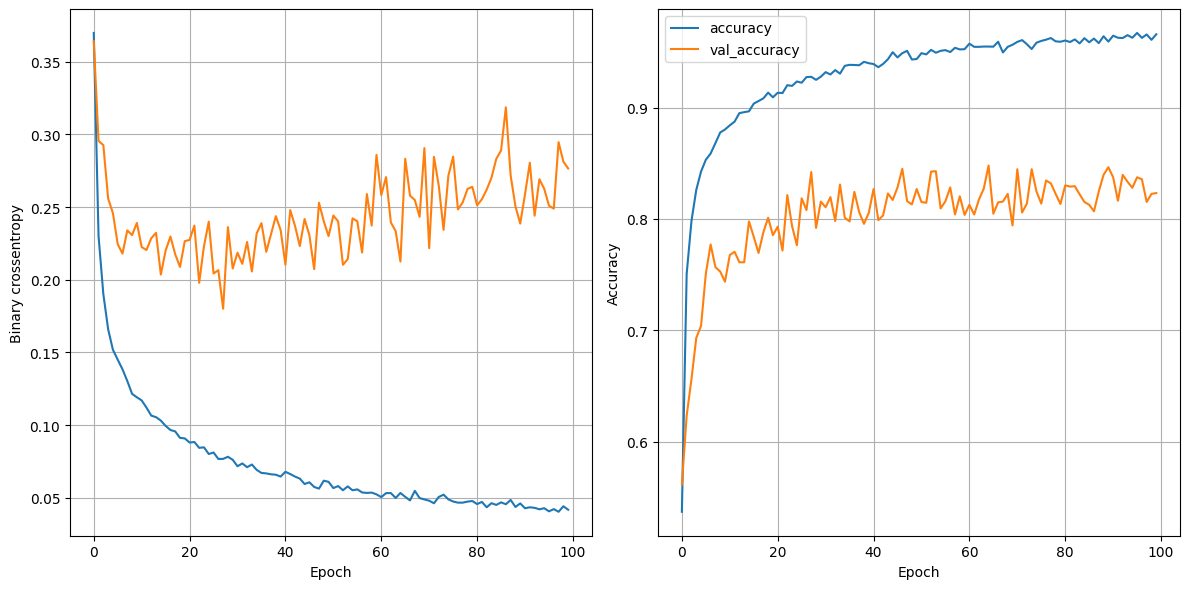

86/86 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8233
32 nodes, 0 dropout_prob, 0.005 lr, 128 batch_size


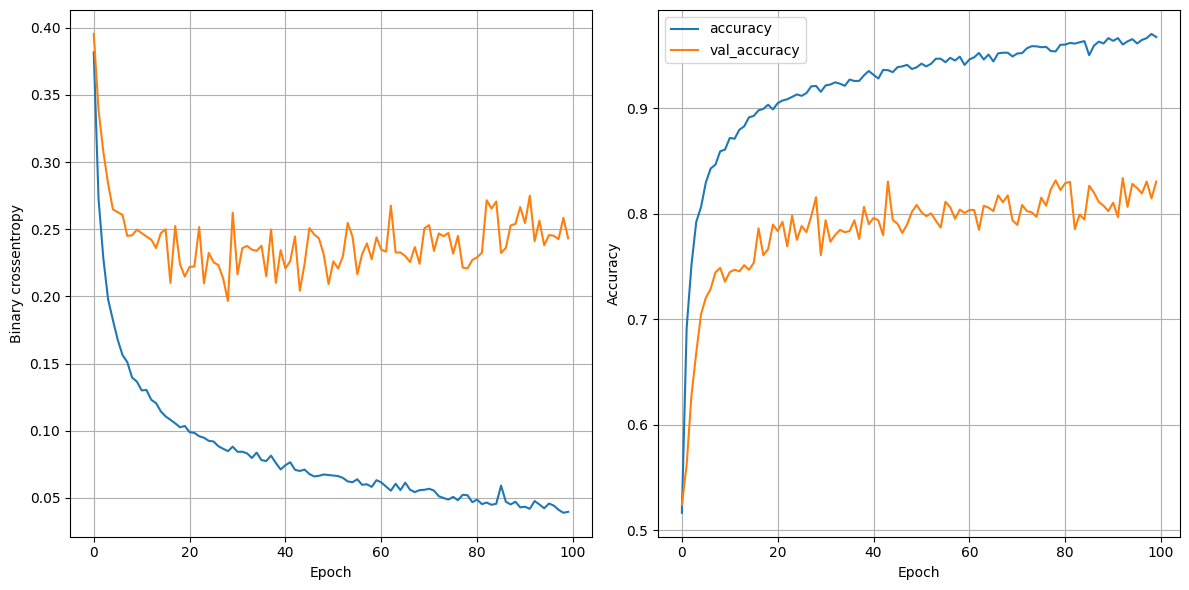

86/86 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.8305
32 nodes, 0 dropout_prob, 0.0001 lr, 32 batch_size


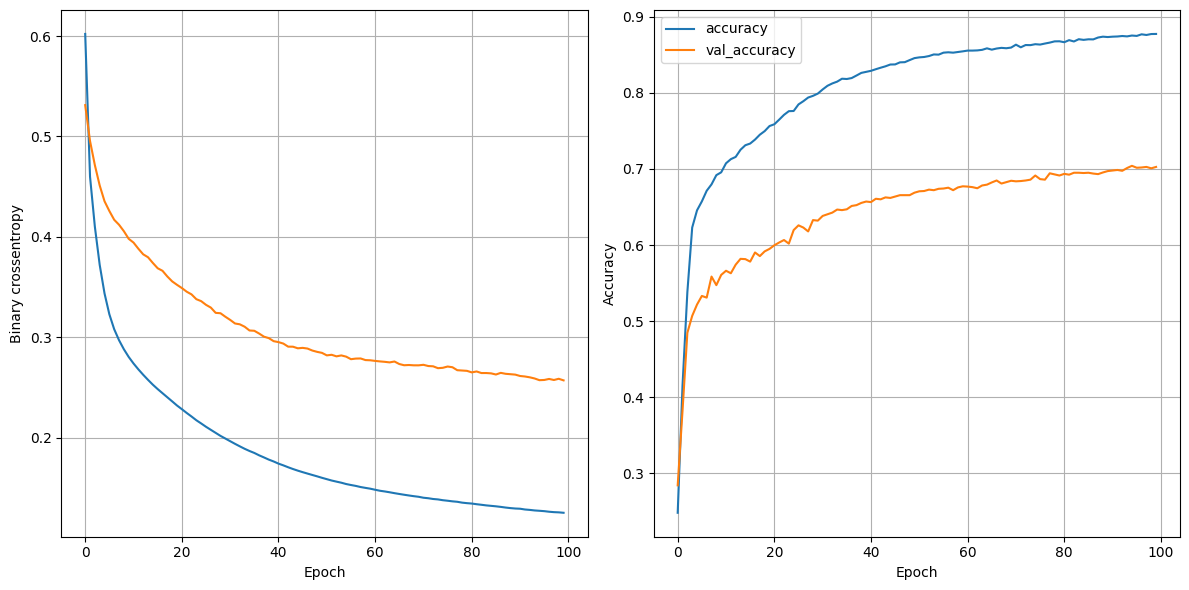

86/86 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.7025
32 nodes, 0 dropout_prob, 0.0001 lr, 64 batch_size


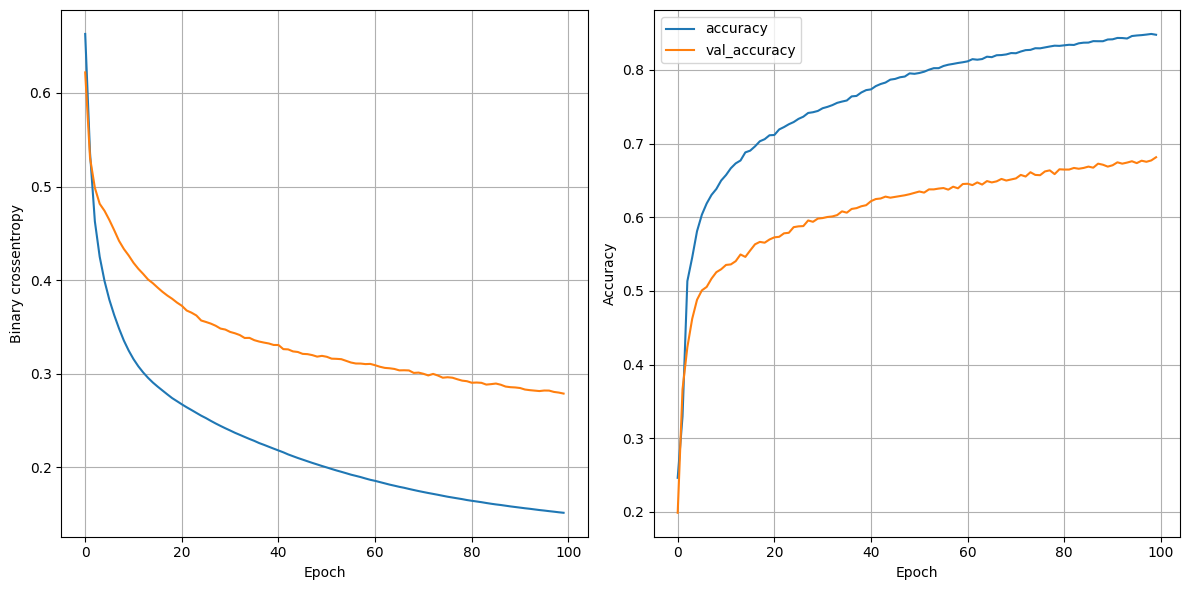

86/86 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.6815
32 nodes, 0 dropout_prob, 0.0001 lr, 128 batch_size


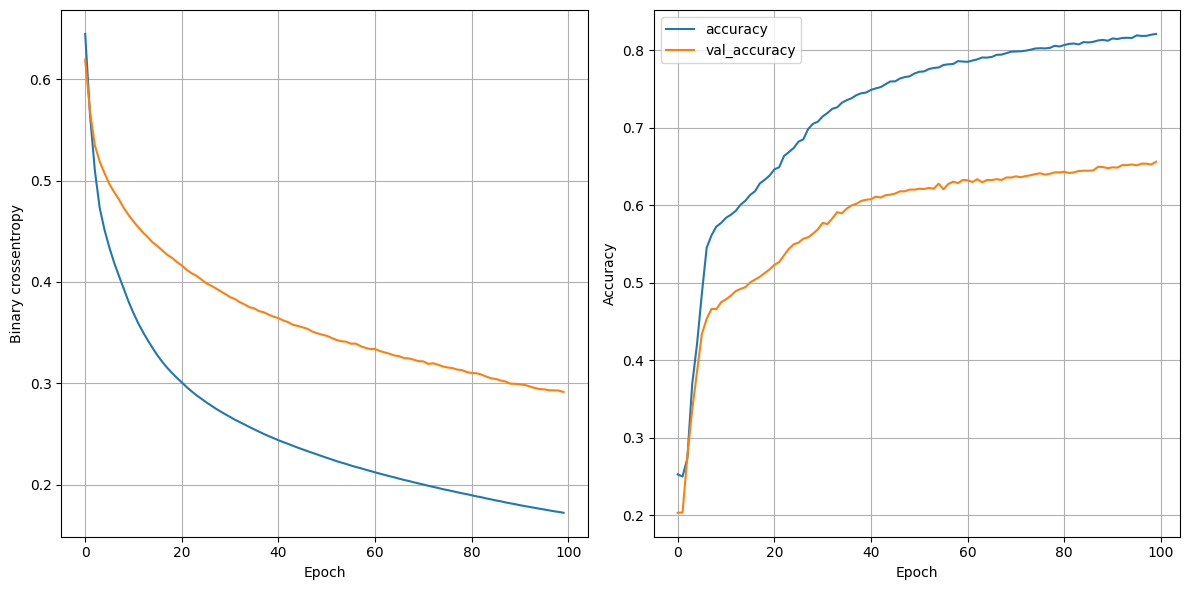

86/86 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.6560
32 nodes, 0.2 dropout_prob, 0.01 lr, 32 batch_size


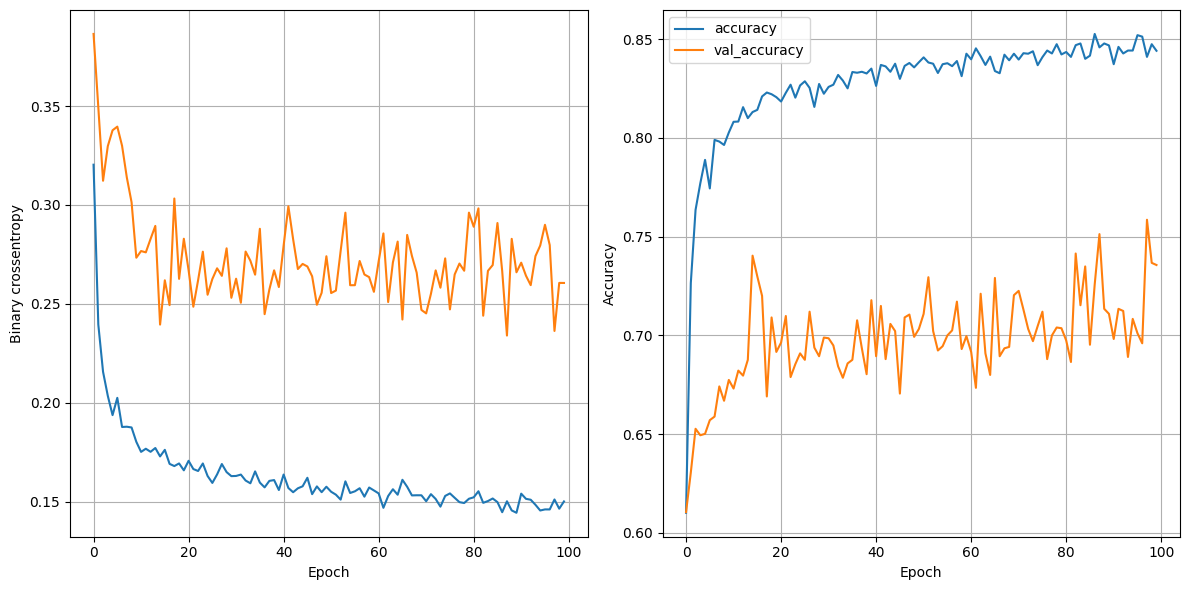

86/86 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.7356
32 nodes, 0.2 dropout_prob, 0.01 lr, 64 batch_size


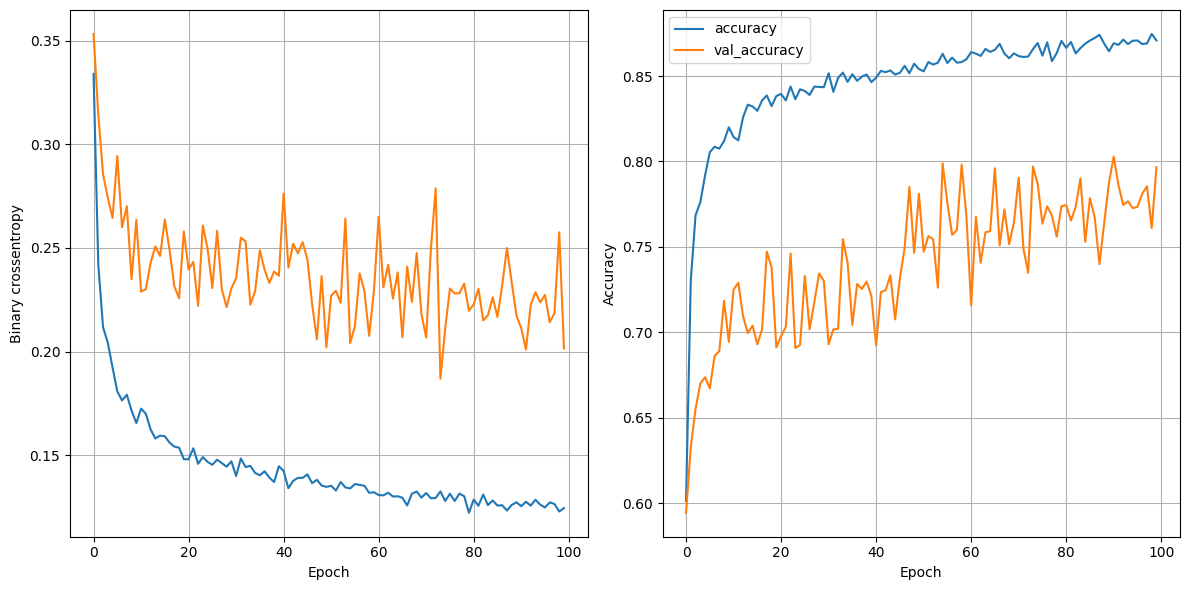

86/86 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.7967
32 nodes, 0.2 dropout_prob, 0.01 lr, 128 batch_size


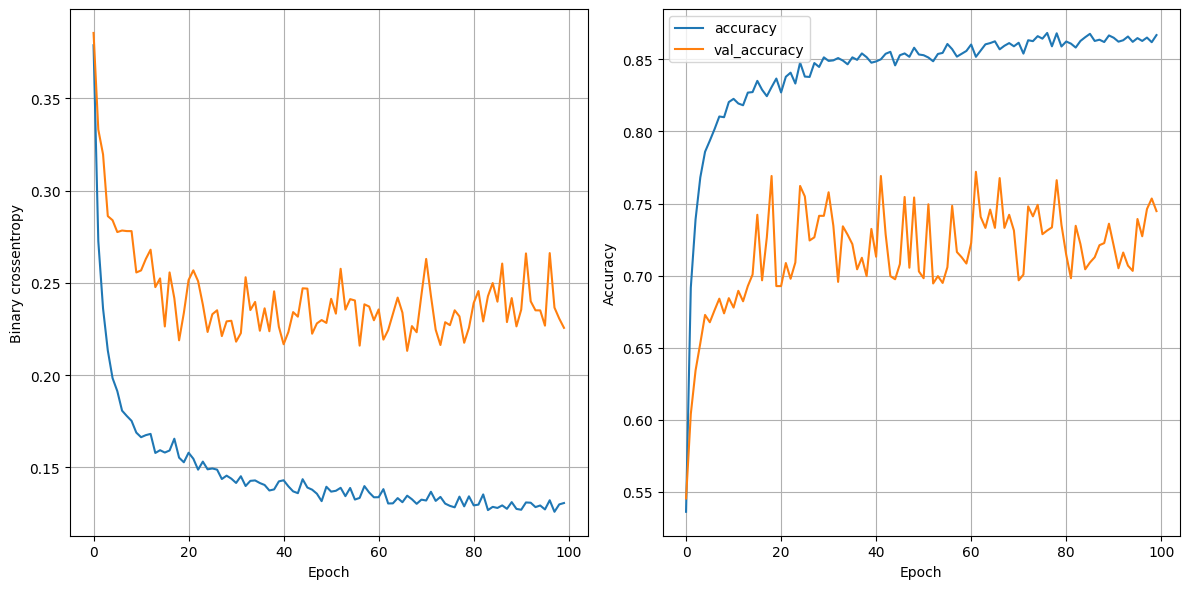

86/86 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.7447
32 nodes, 0.2 dropout_prob, 0.005 lr, 32 batch_size


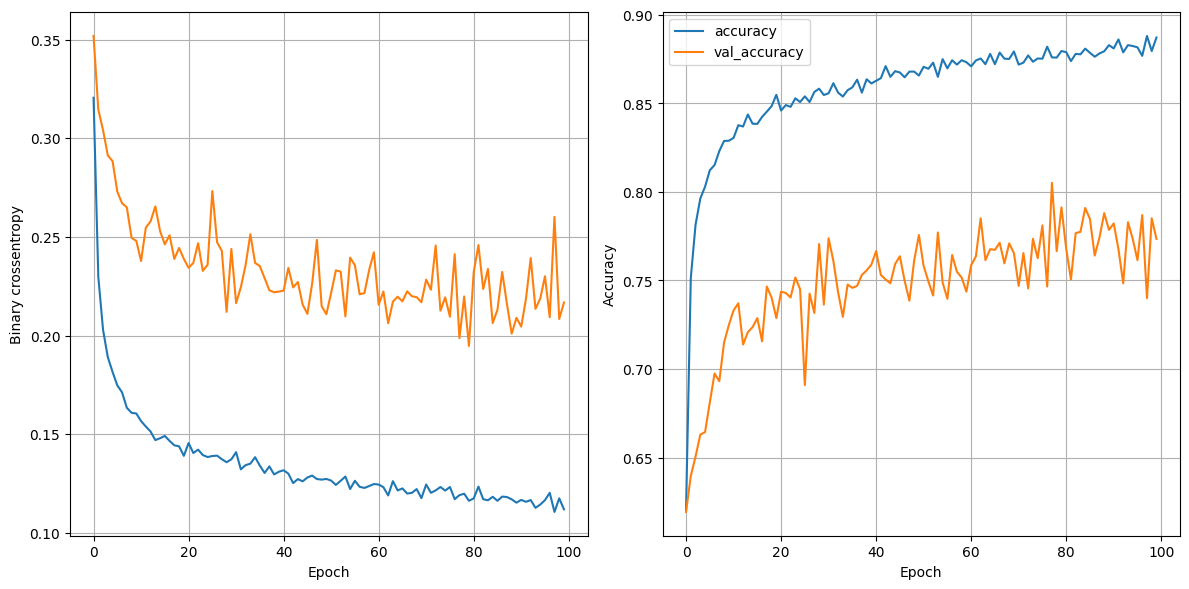

86/86 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.7735
32 nodes, 0.2 dropout_prob, 0.005 lr, 64 batch_size


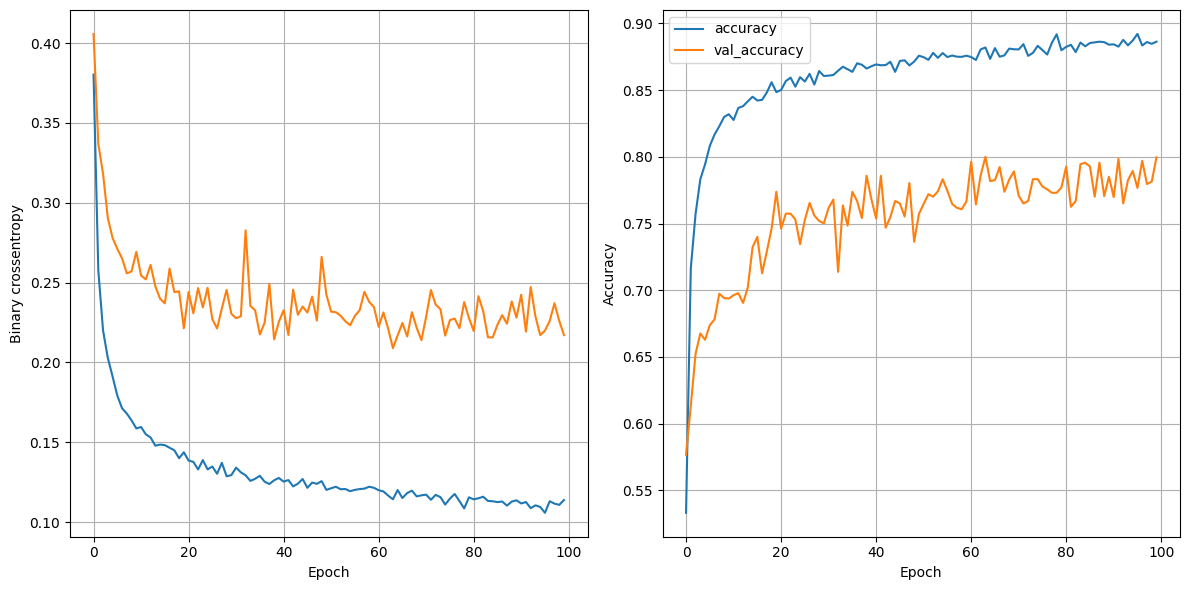

86/86 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.7996
32 nodes, 0.2 dropout_prob, 0.005 lr, 128 batch_size


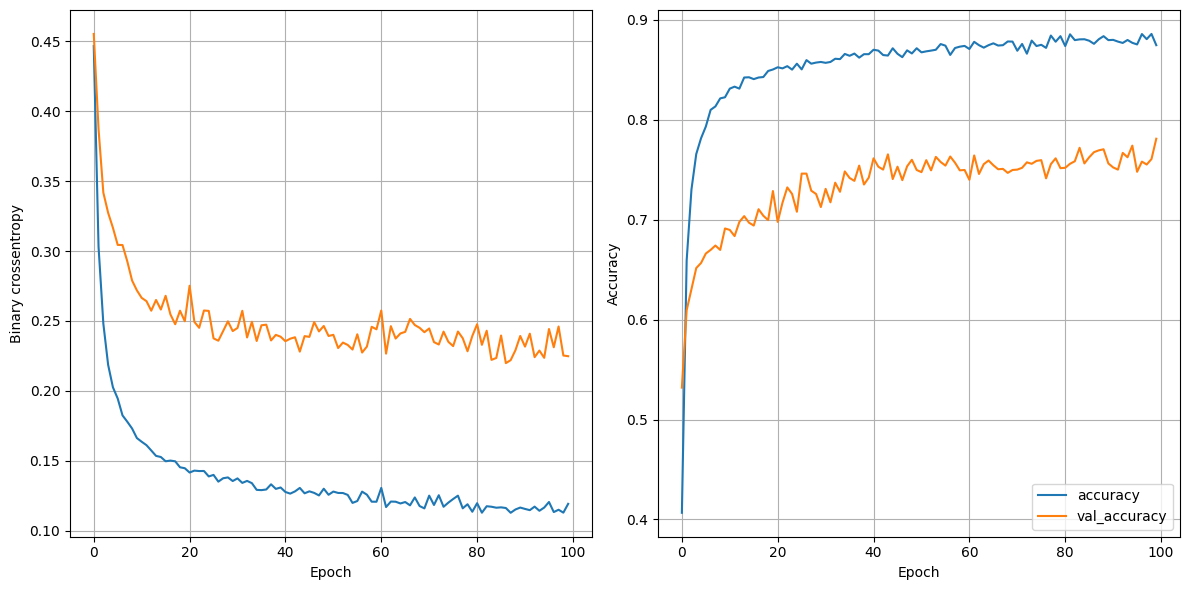

86/86 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.7811
32 nodes, 0.2 dropout_prob, 0.0001 lr, 32 batch_size


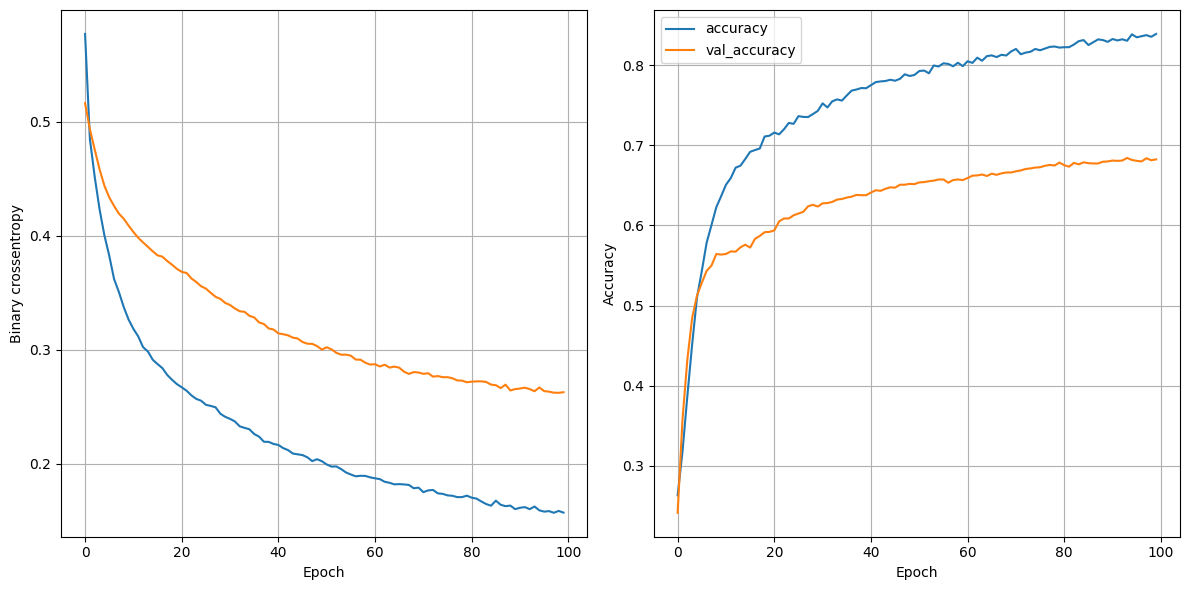

86/86 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.6825
32 nodes, 0.2 dropout_prob, 0.0001 lr, 64 batch_size


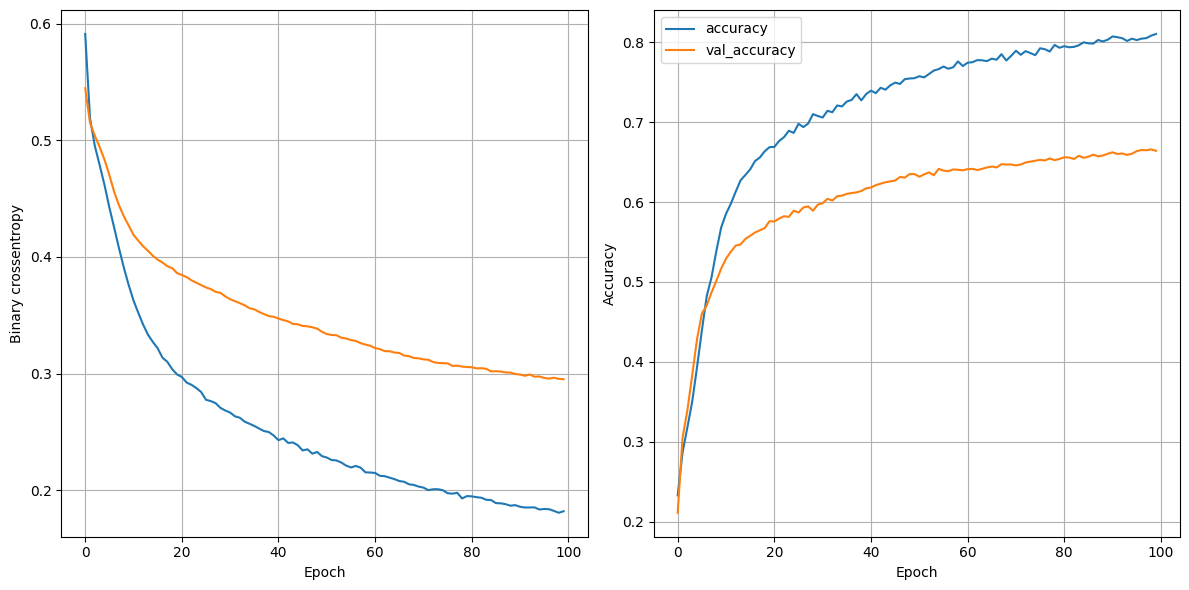

86/86 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.6640
32 nodes, 0.2 dropout_prob, 0.0001 lr, 128 batch_size


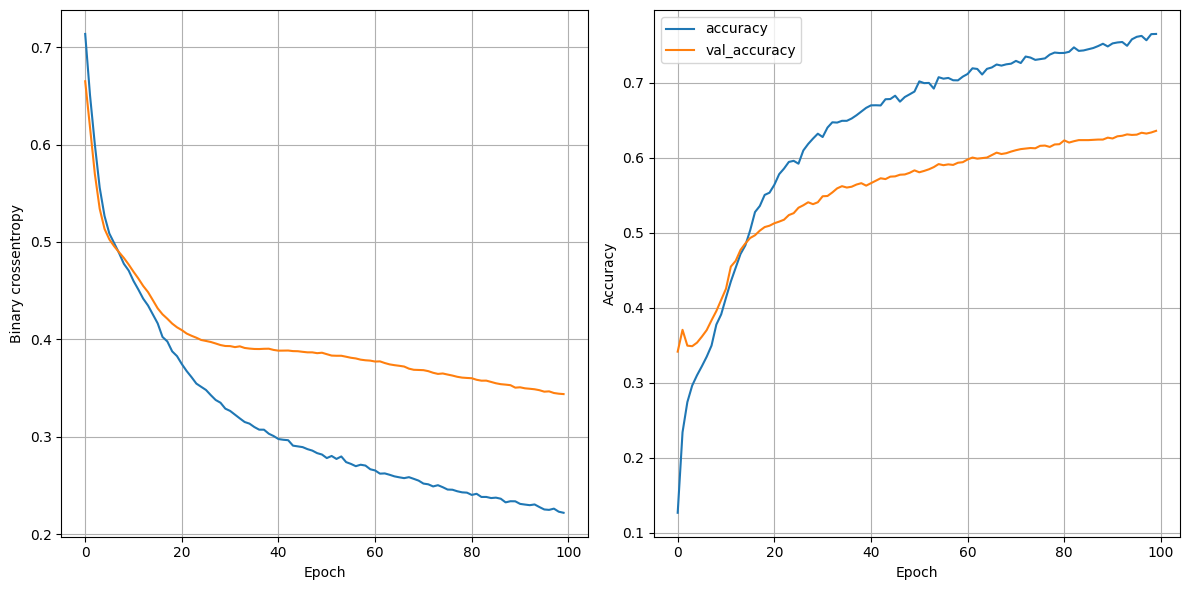

86/86 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.6360
64 nodes, 0 dropout_prob, 0.01 lr, 32 batch_size


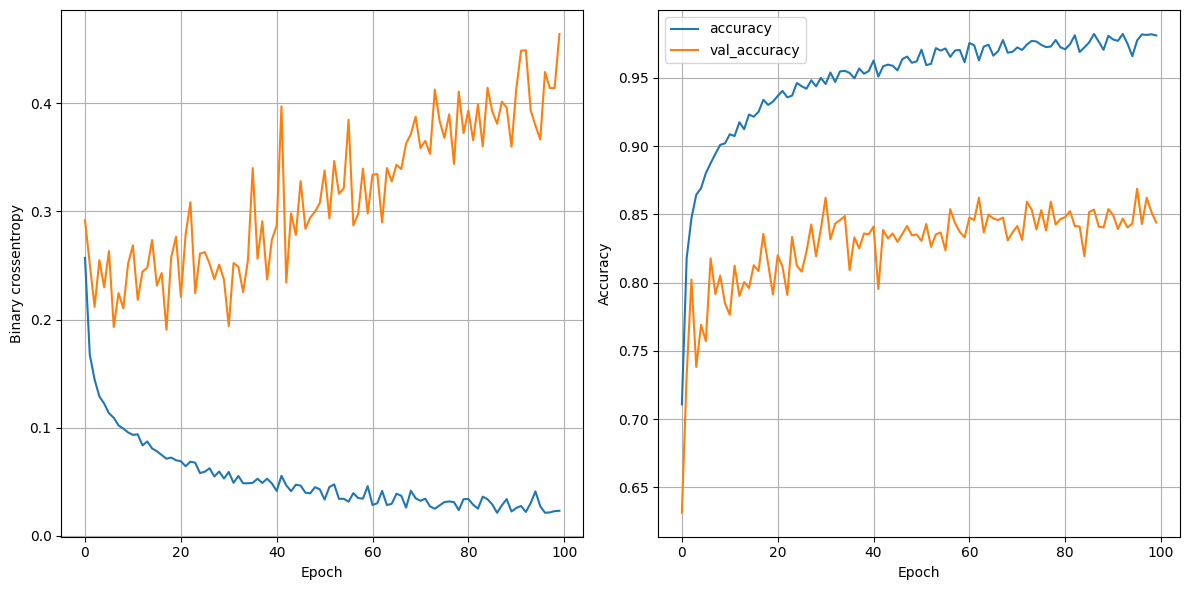

86/86 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8440
64 nodes, 0 dropout_prob, 0.01 lr, 64 batch_size


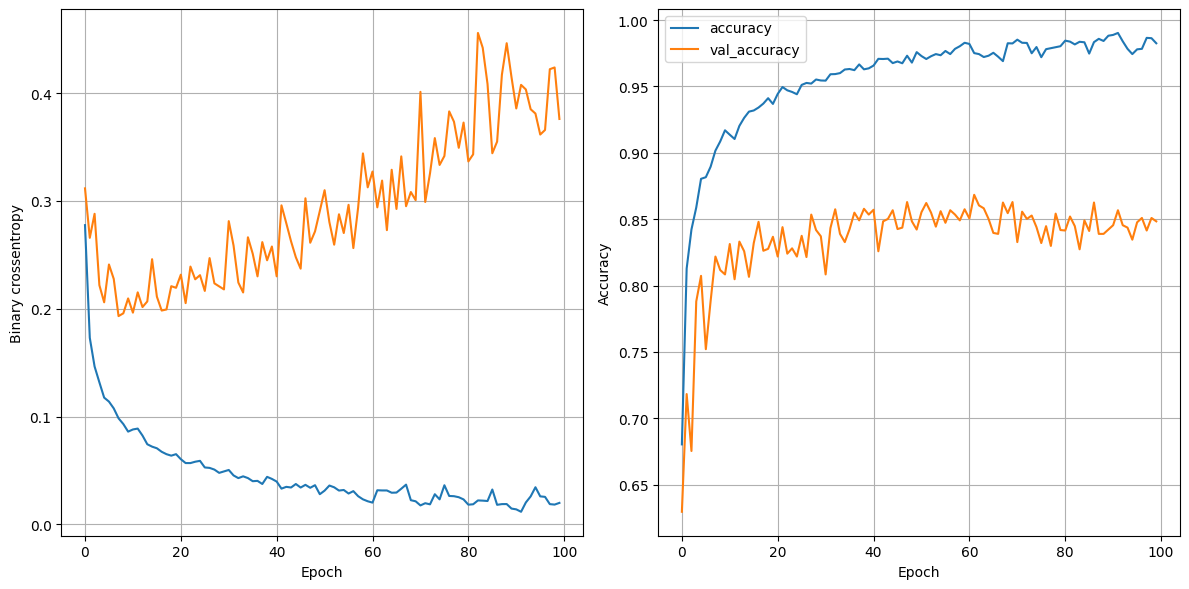

86/86 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8484
64 nodes, 0 dropout_prob, 0.01 lr, 128 batch_size


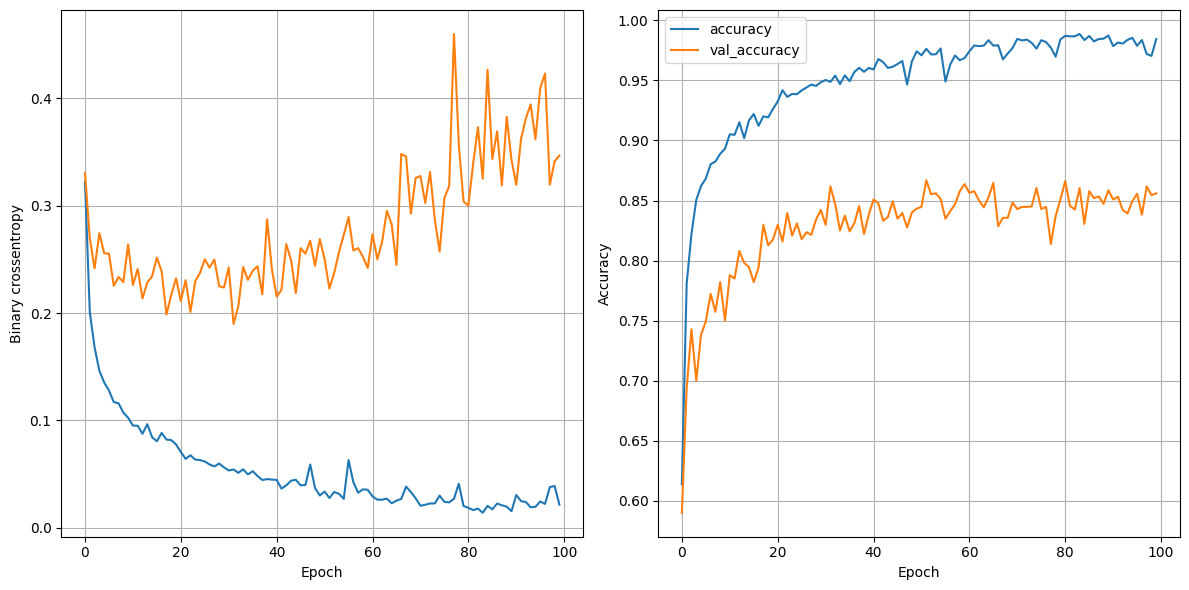

86/86 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8560
64 nodes, 0 dropout_prob, 0.005 lr, 32 batch_size


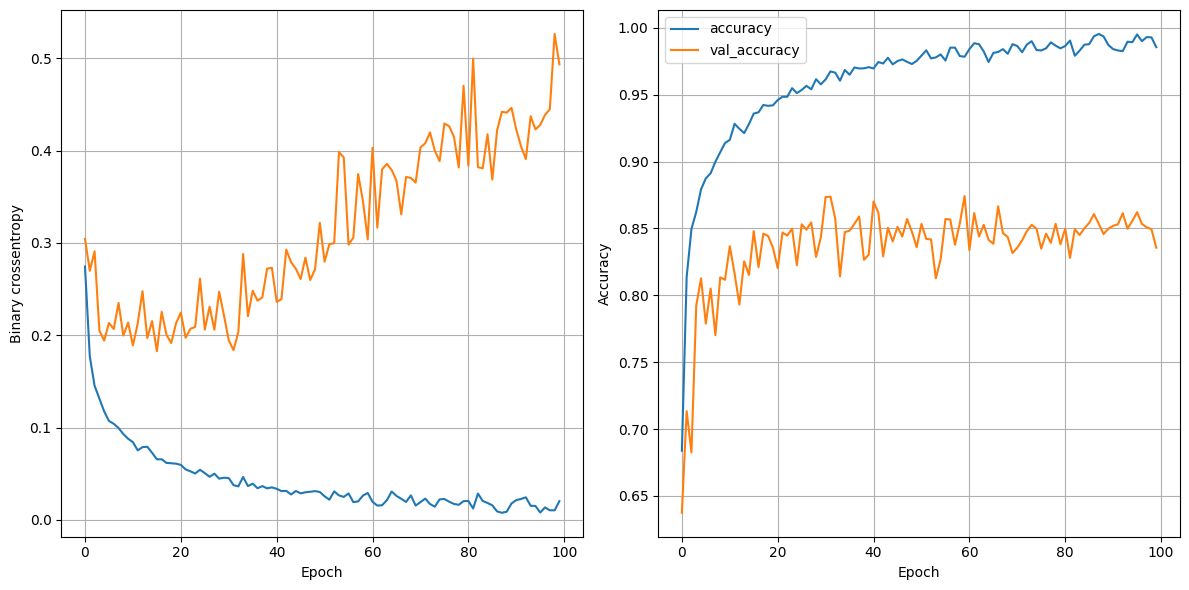

86/86 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.8356
64 nodes, 0 dropout_prob, 0.005 lr, 64 batch_size


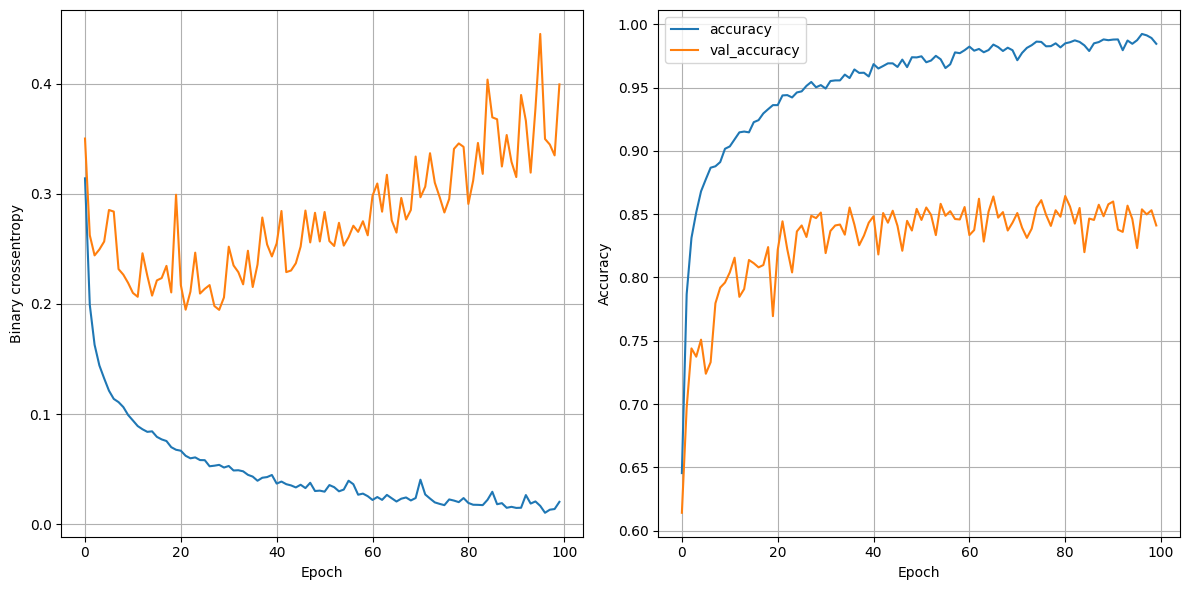

86/86 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8411
64 nodes, 0 dropout_prob, 0.005 lr, 128 batch_size


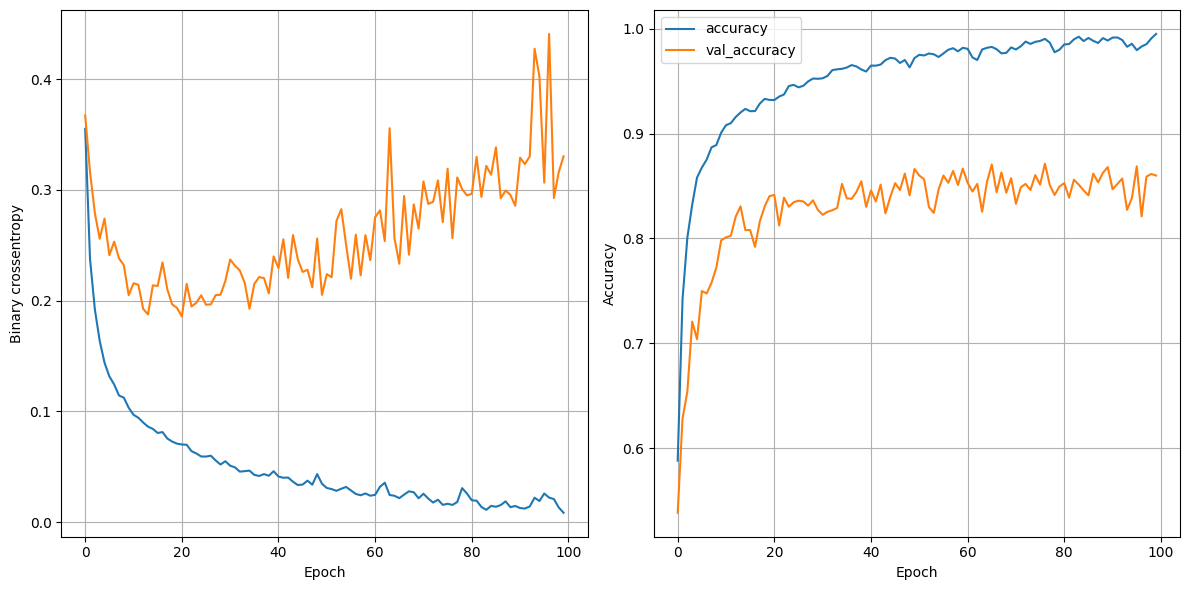

86/86 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8600
64 nodes, 0 dropout_prob, 0.0001 lr, 32 batch_size


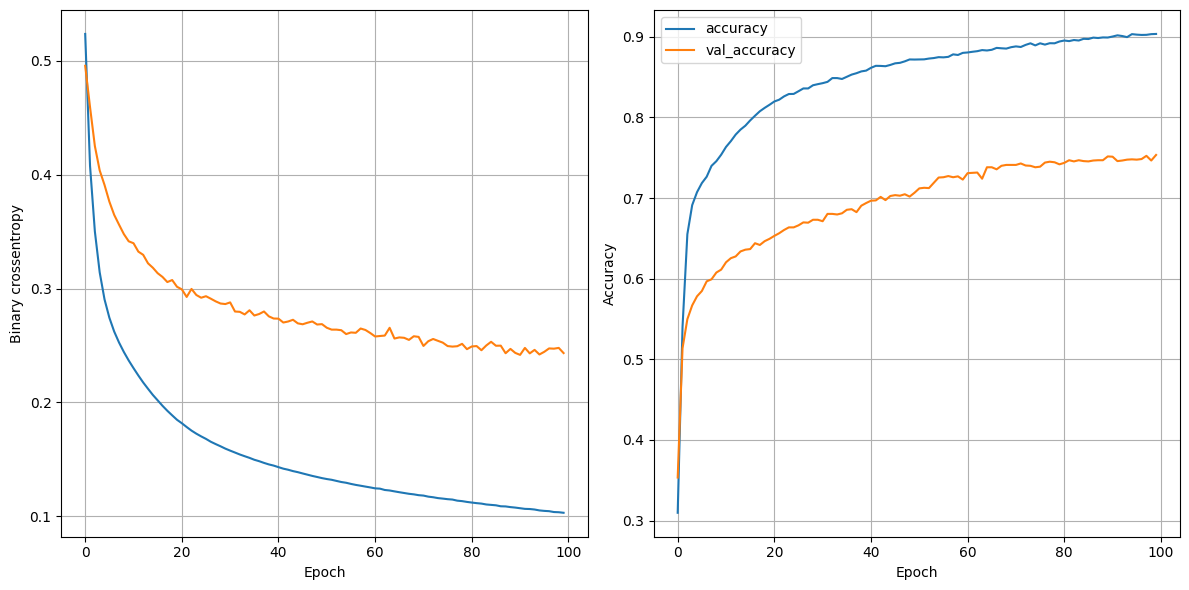

86/86 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.7535
64 nodes, 0 dropout_prob, 0.0001 lr, 64 batch_size


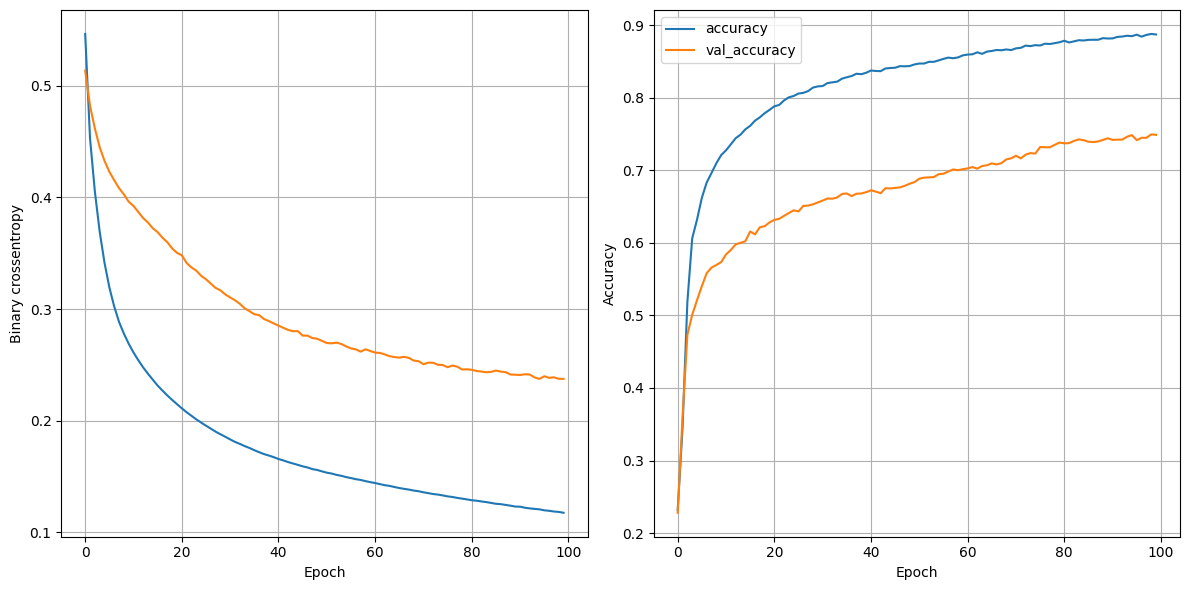

86/86 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.7487
64 nodes, 0 dropout_prob, 0.0001 lr, 128 batch_size


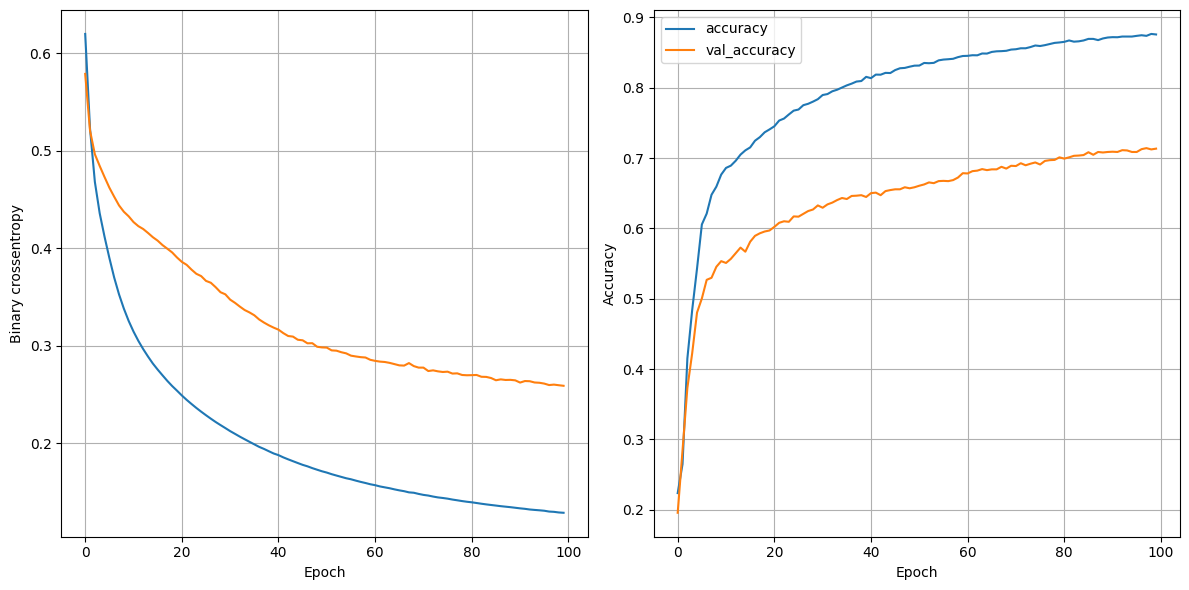

86/86 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.7135
64 nodes, 0.2 dropout_prob, 0.01 lr, 32 batch_size


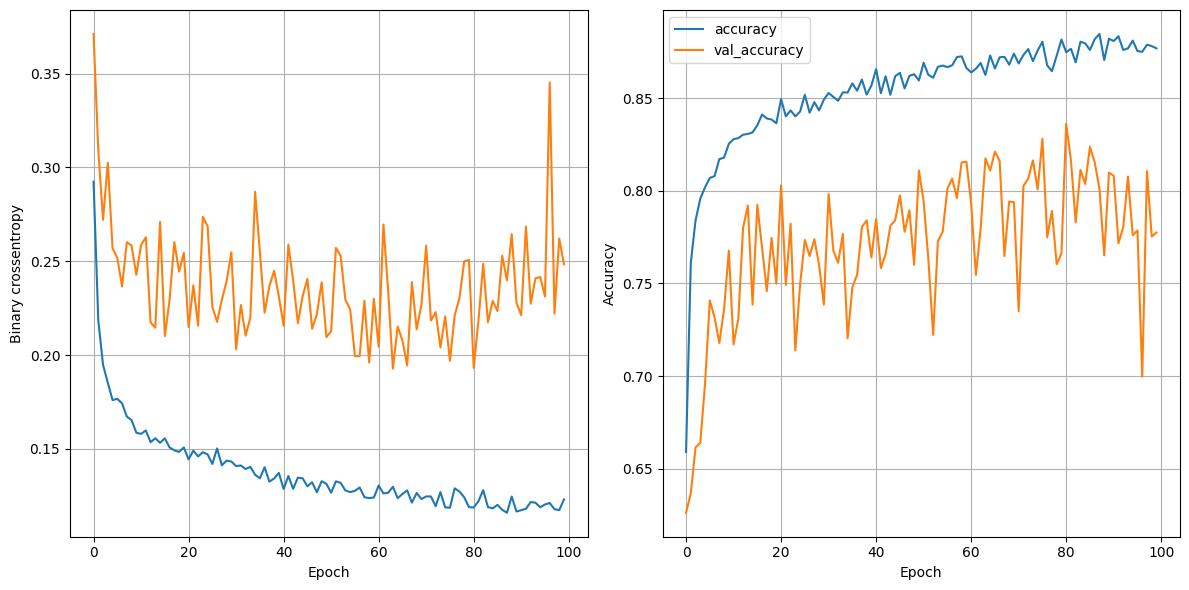

86/86 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.7775
64 nodes, 0.2 dropout_prob, 0.01 lr, 64 batch_size


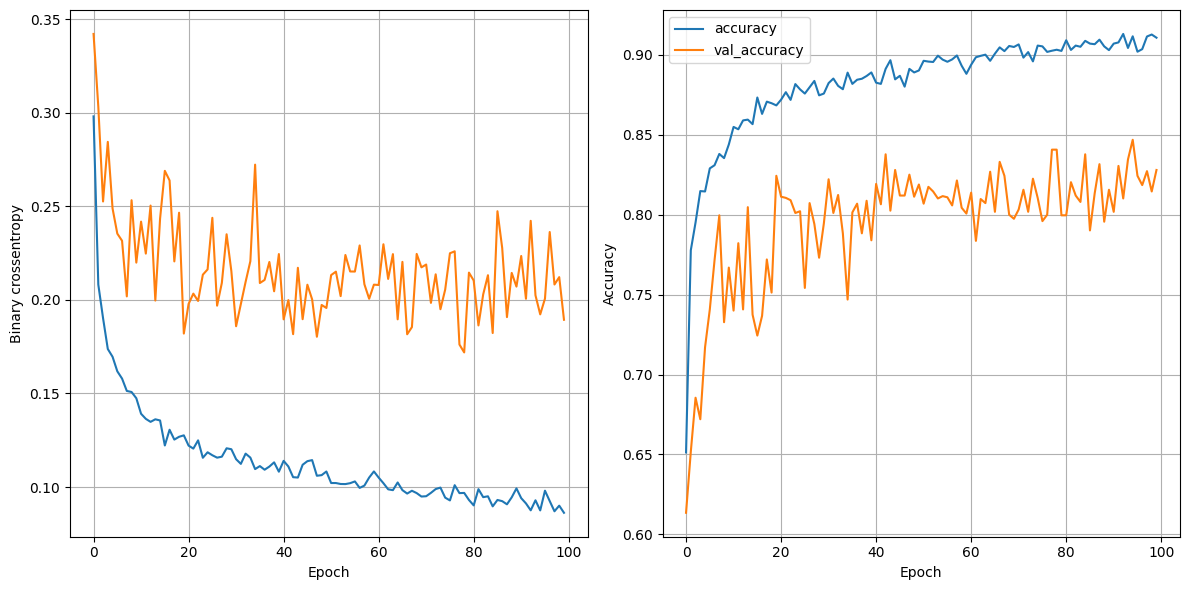

86/86 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.8280
64 nodes, 0.2 dropout_prob, 0.01 lr, 128 batch_size


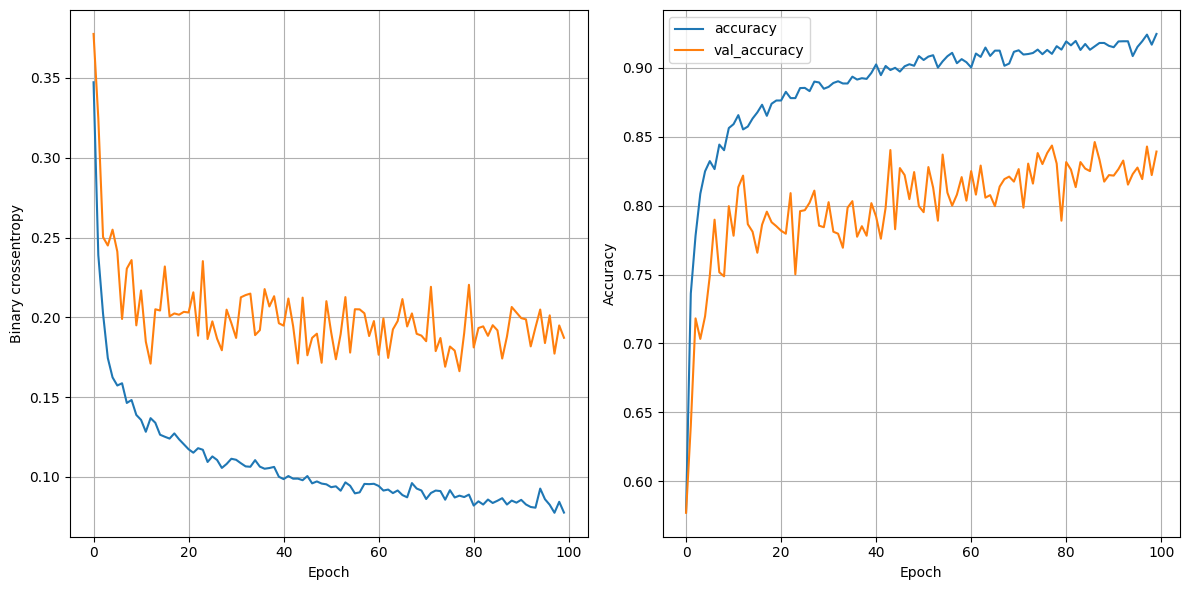

86/86 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.8393
64 nodes, 0.2 dropout_prob, 0.005 lr, 32 batch_size


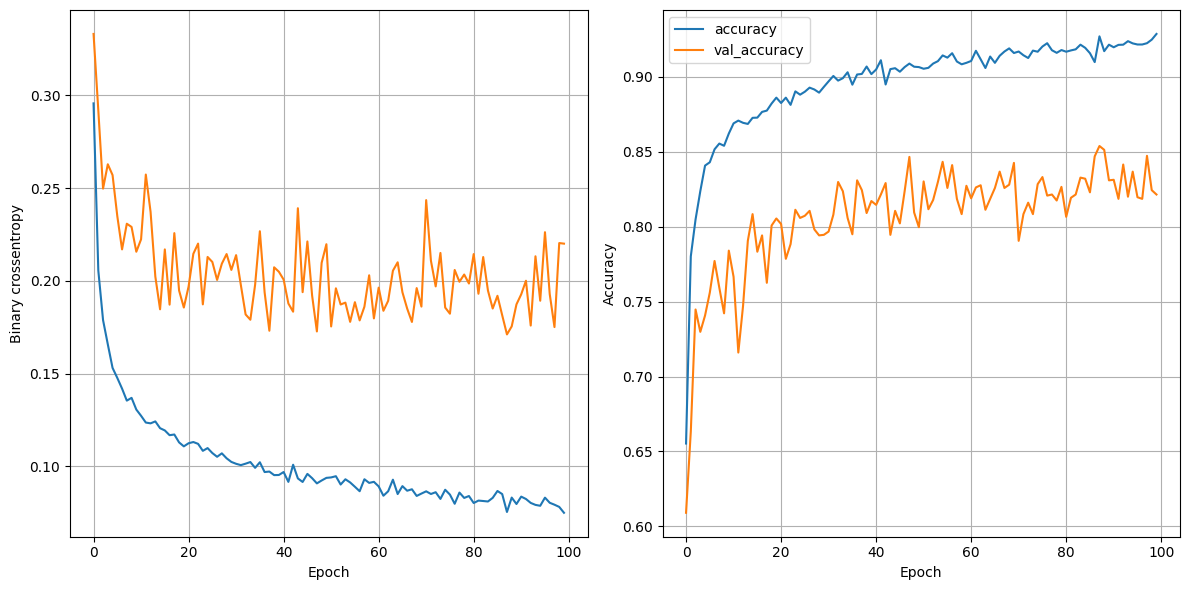

86/86 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.8215
64 nodes, 0.2 dropout_prob, 0.005 lr, 64 batch_size


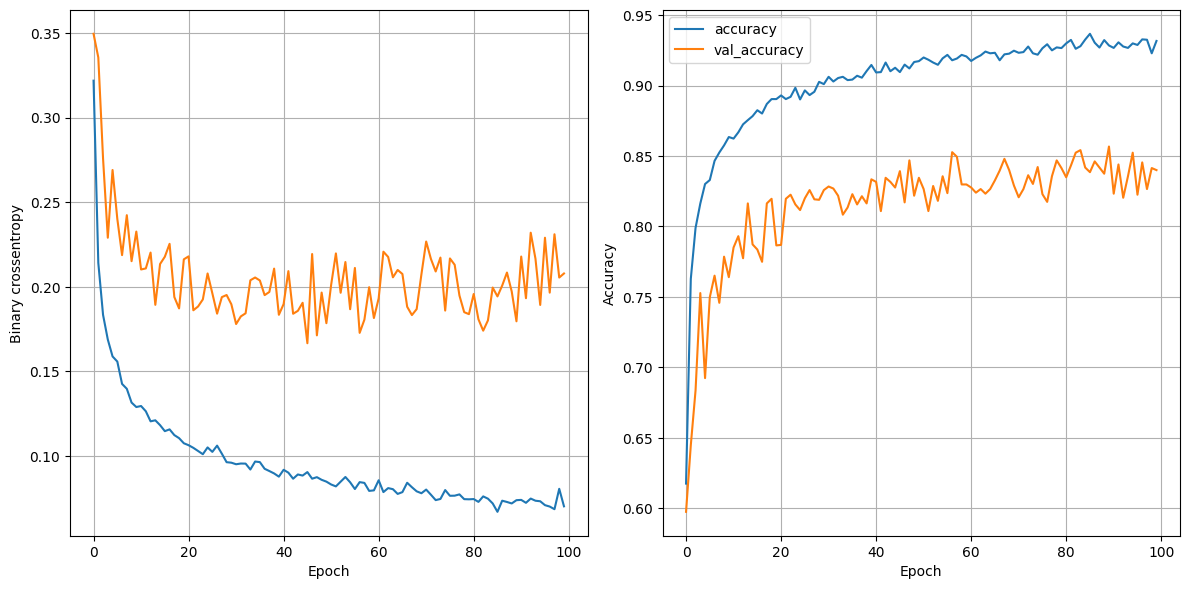

86/86 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.8400
64 nodes, 0.2 dropout_prob, 0.005 lr, 128 batch_size


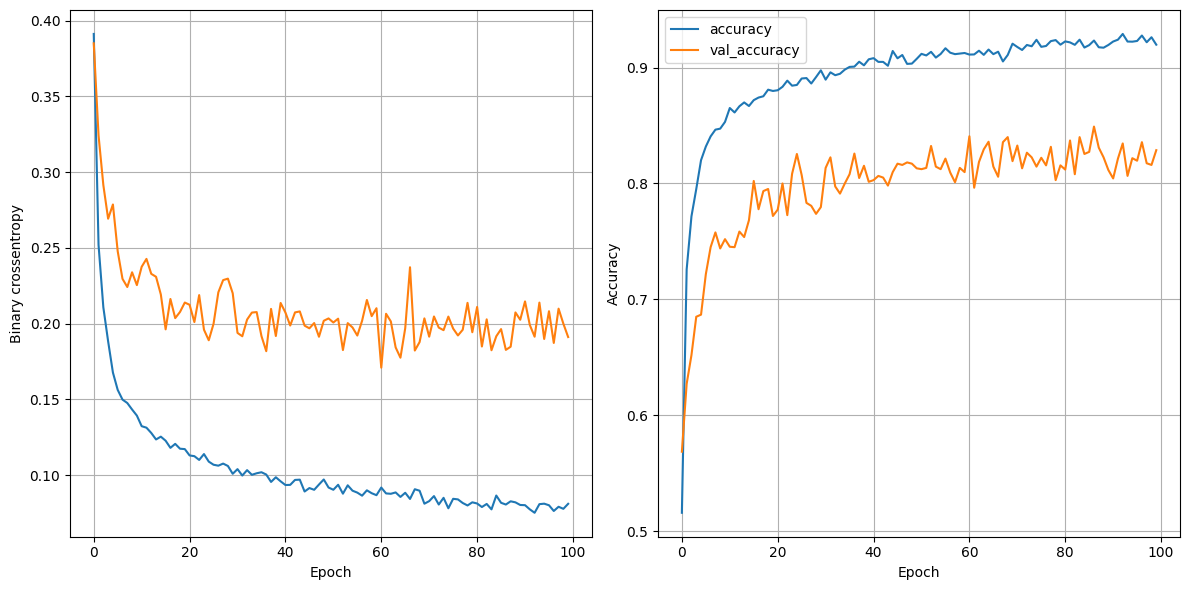

86/86 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.8287
64 nodes, 0.2 dropout_prob, 0.0001 lr, 32 batch_size


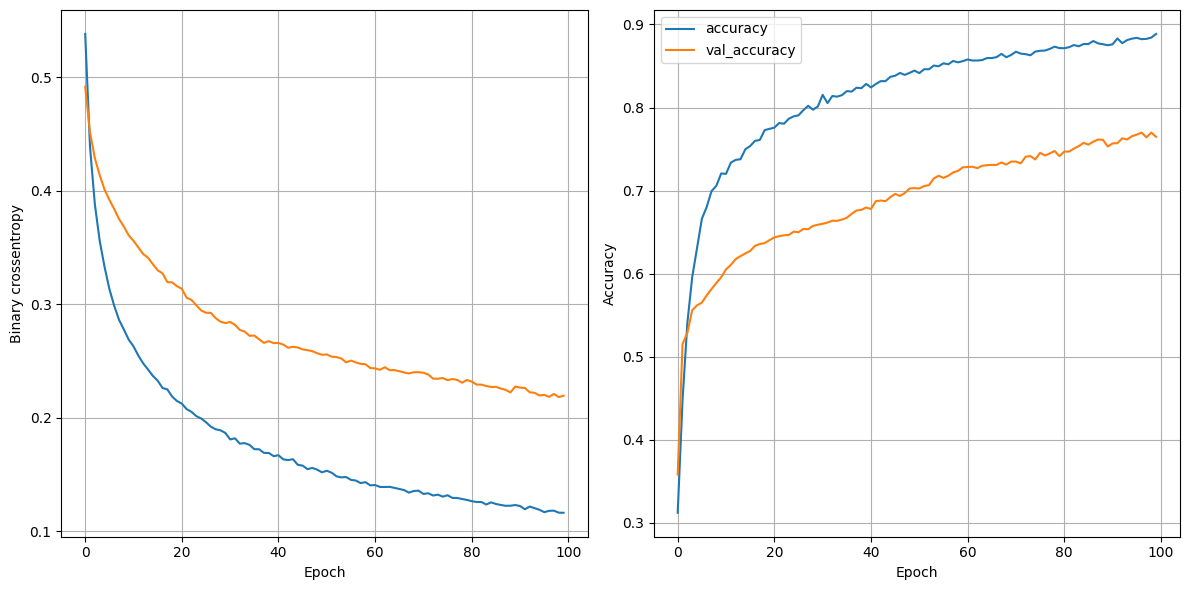

86/86 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.7647
64 nodes, 0.2 dropout_prob, 0.0001 lr, 64 batch_size


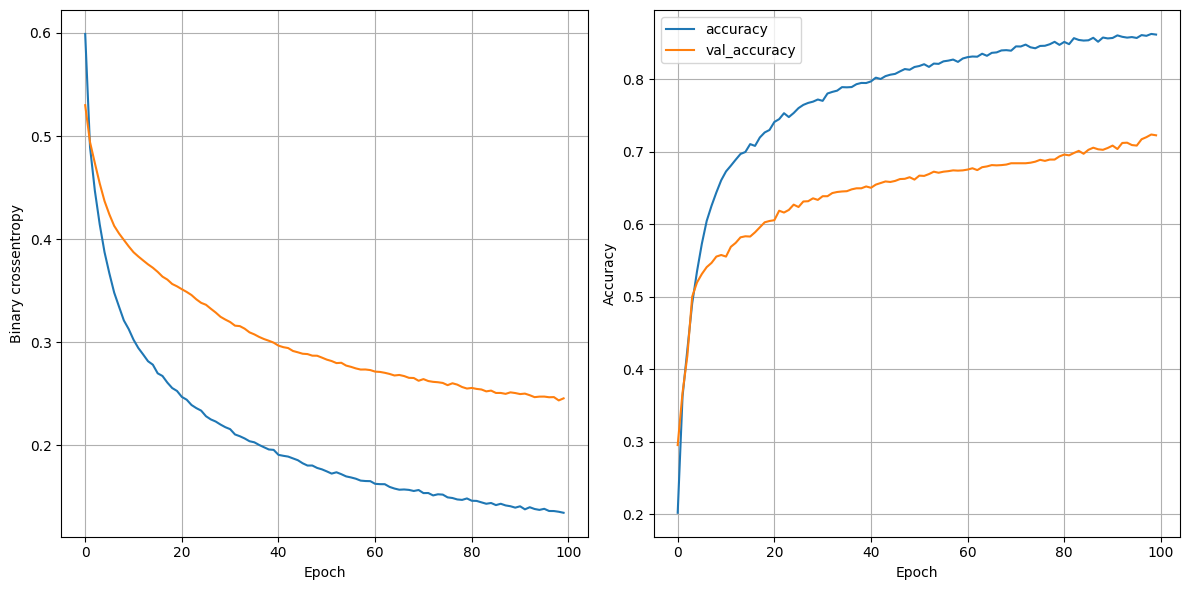

86/86 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.7225
64 nodes, 0.2 dropout_prob, 0.0001 lr, 128 batch_size


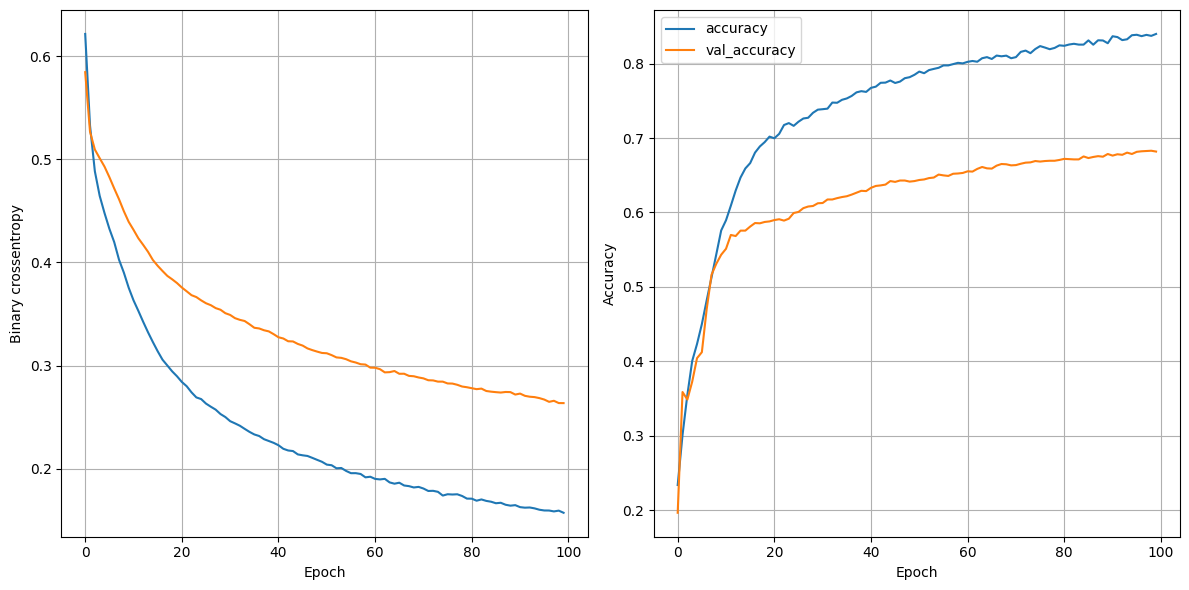

86/86 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.6818


In [187]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in[0.01, 0.005, 0.0001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout_prob, {lr} lr, {batch_size} batch_size")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_test, y_test)[0]  # Get the loss value from the list starting from the first
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

